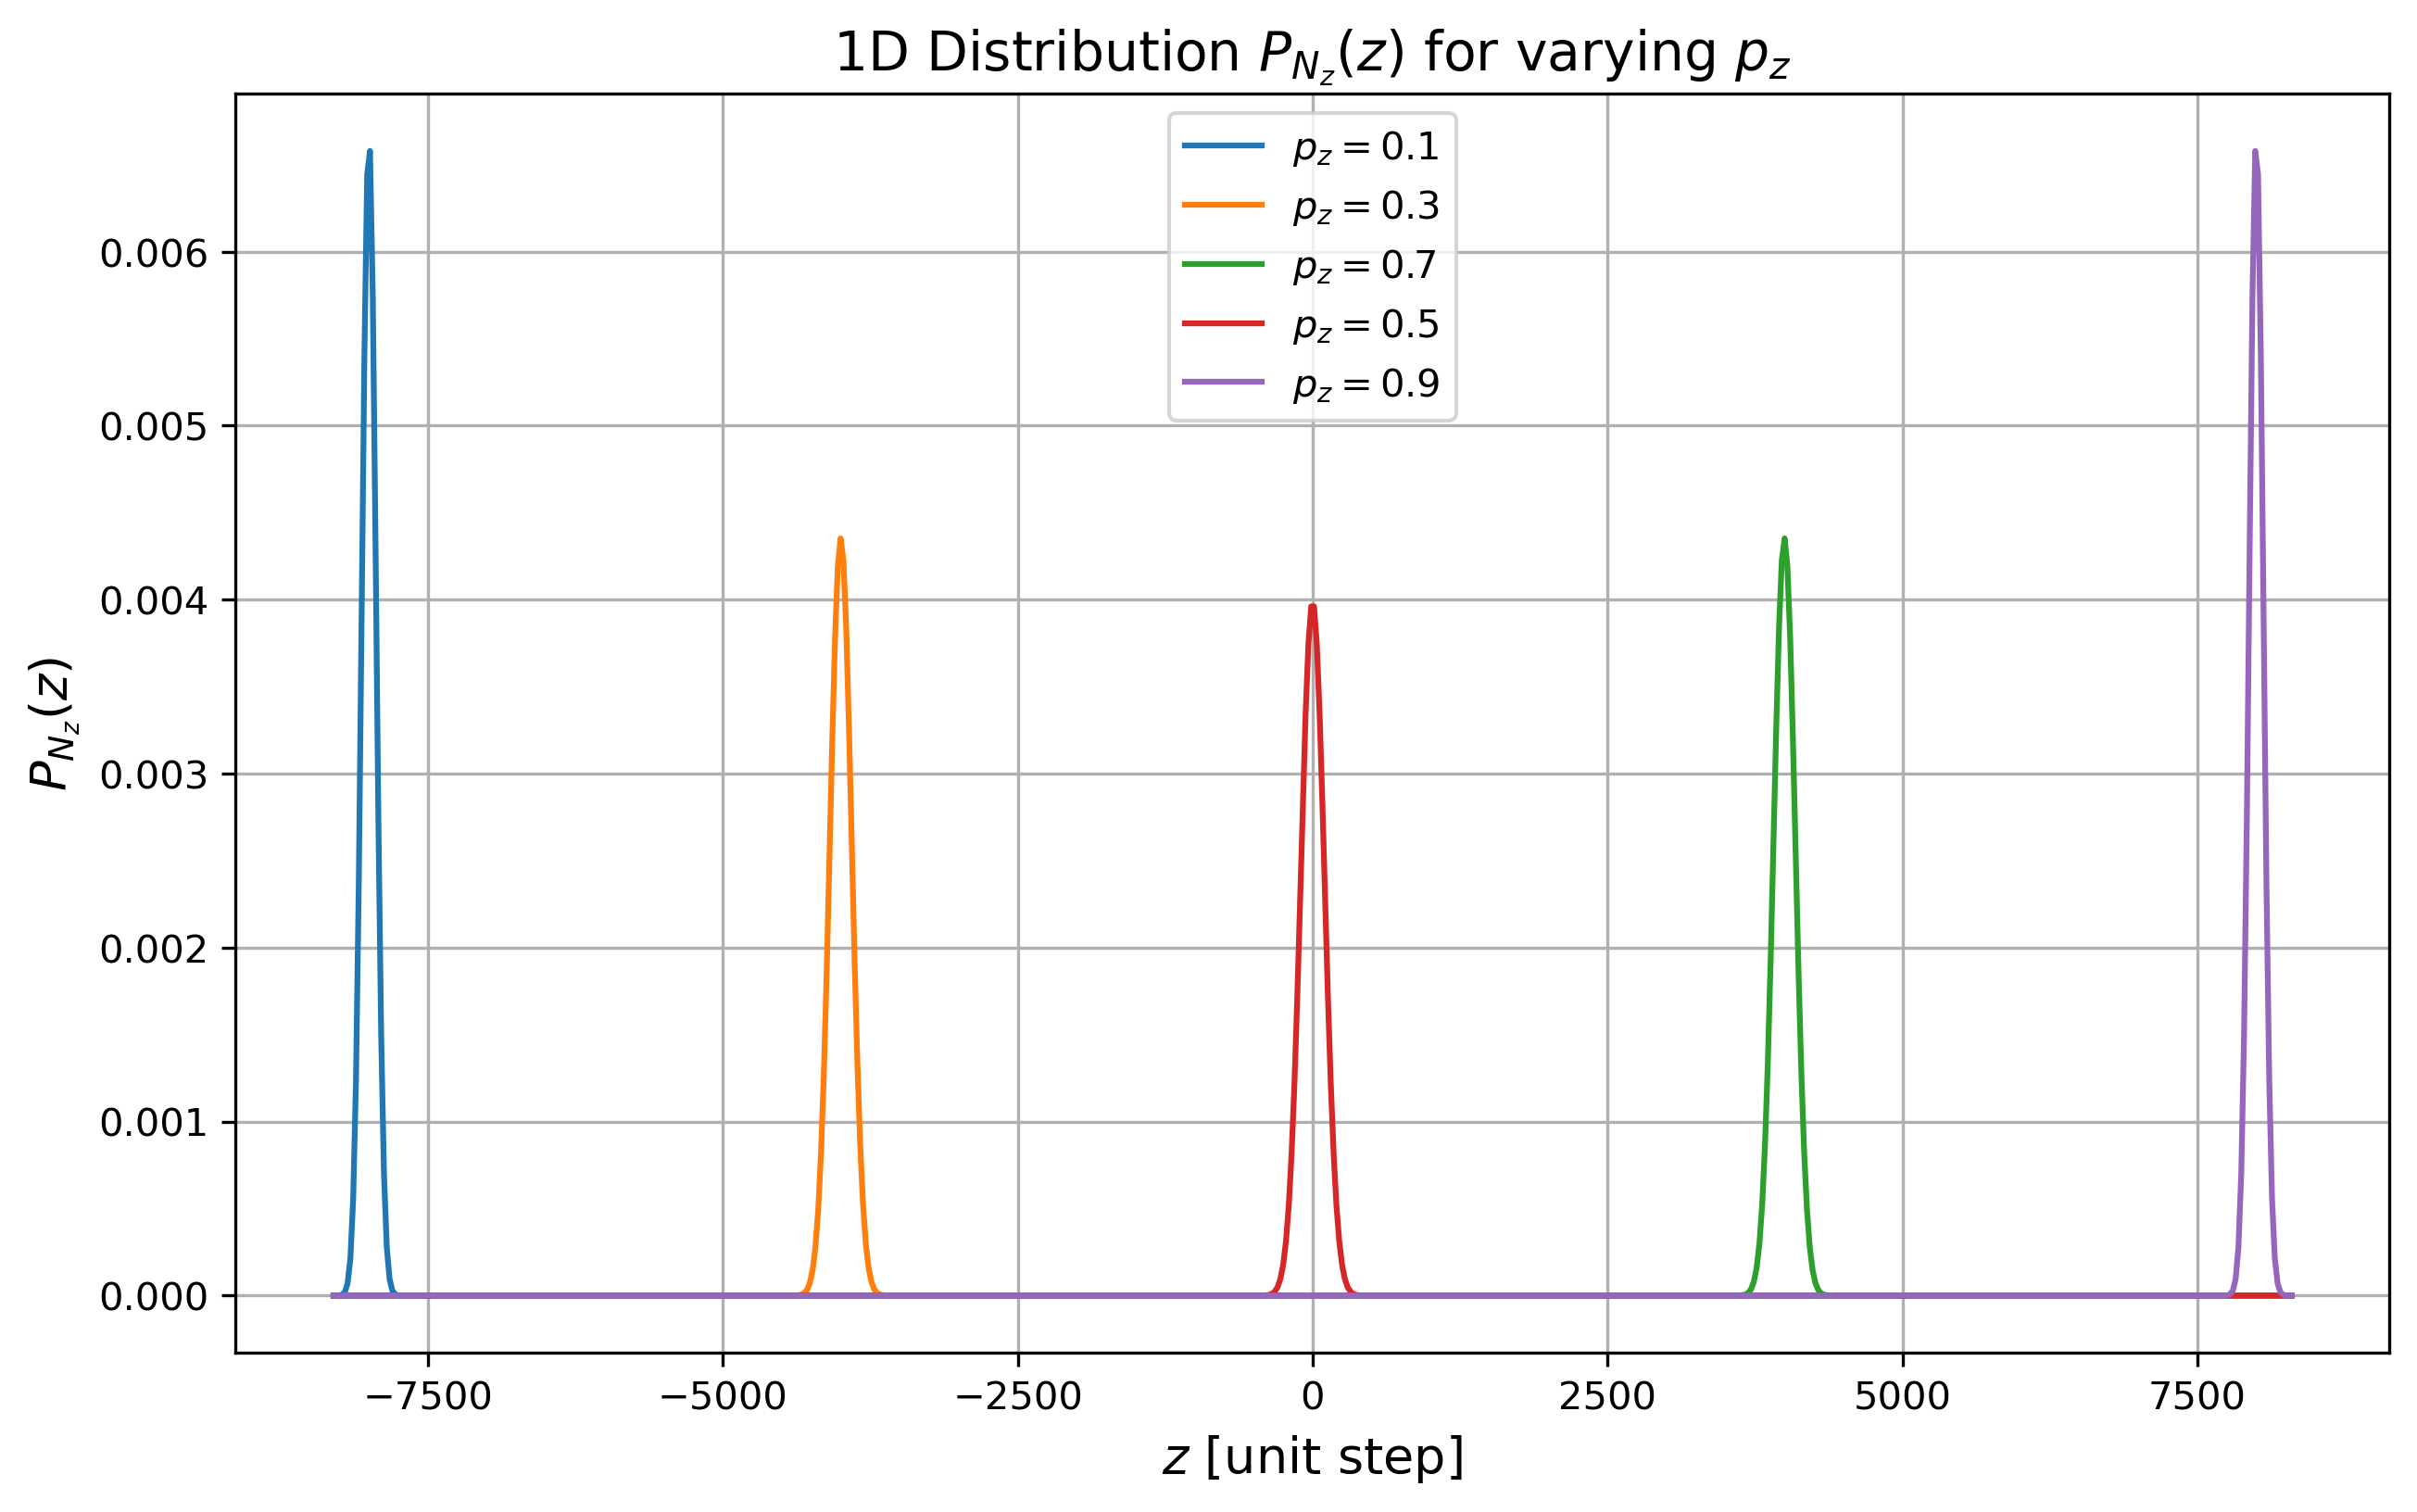

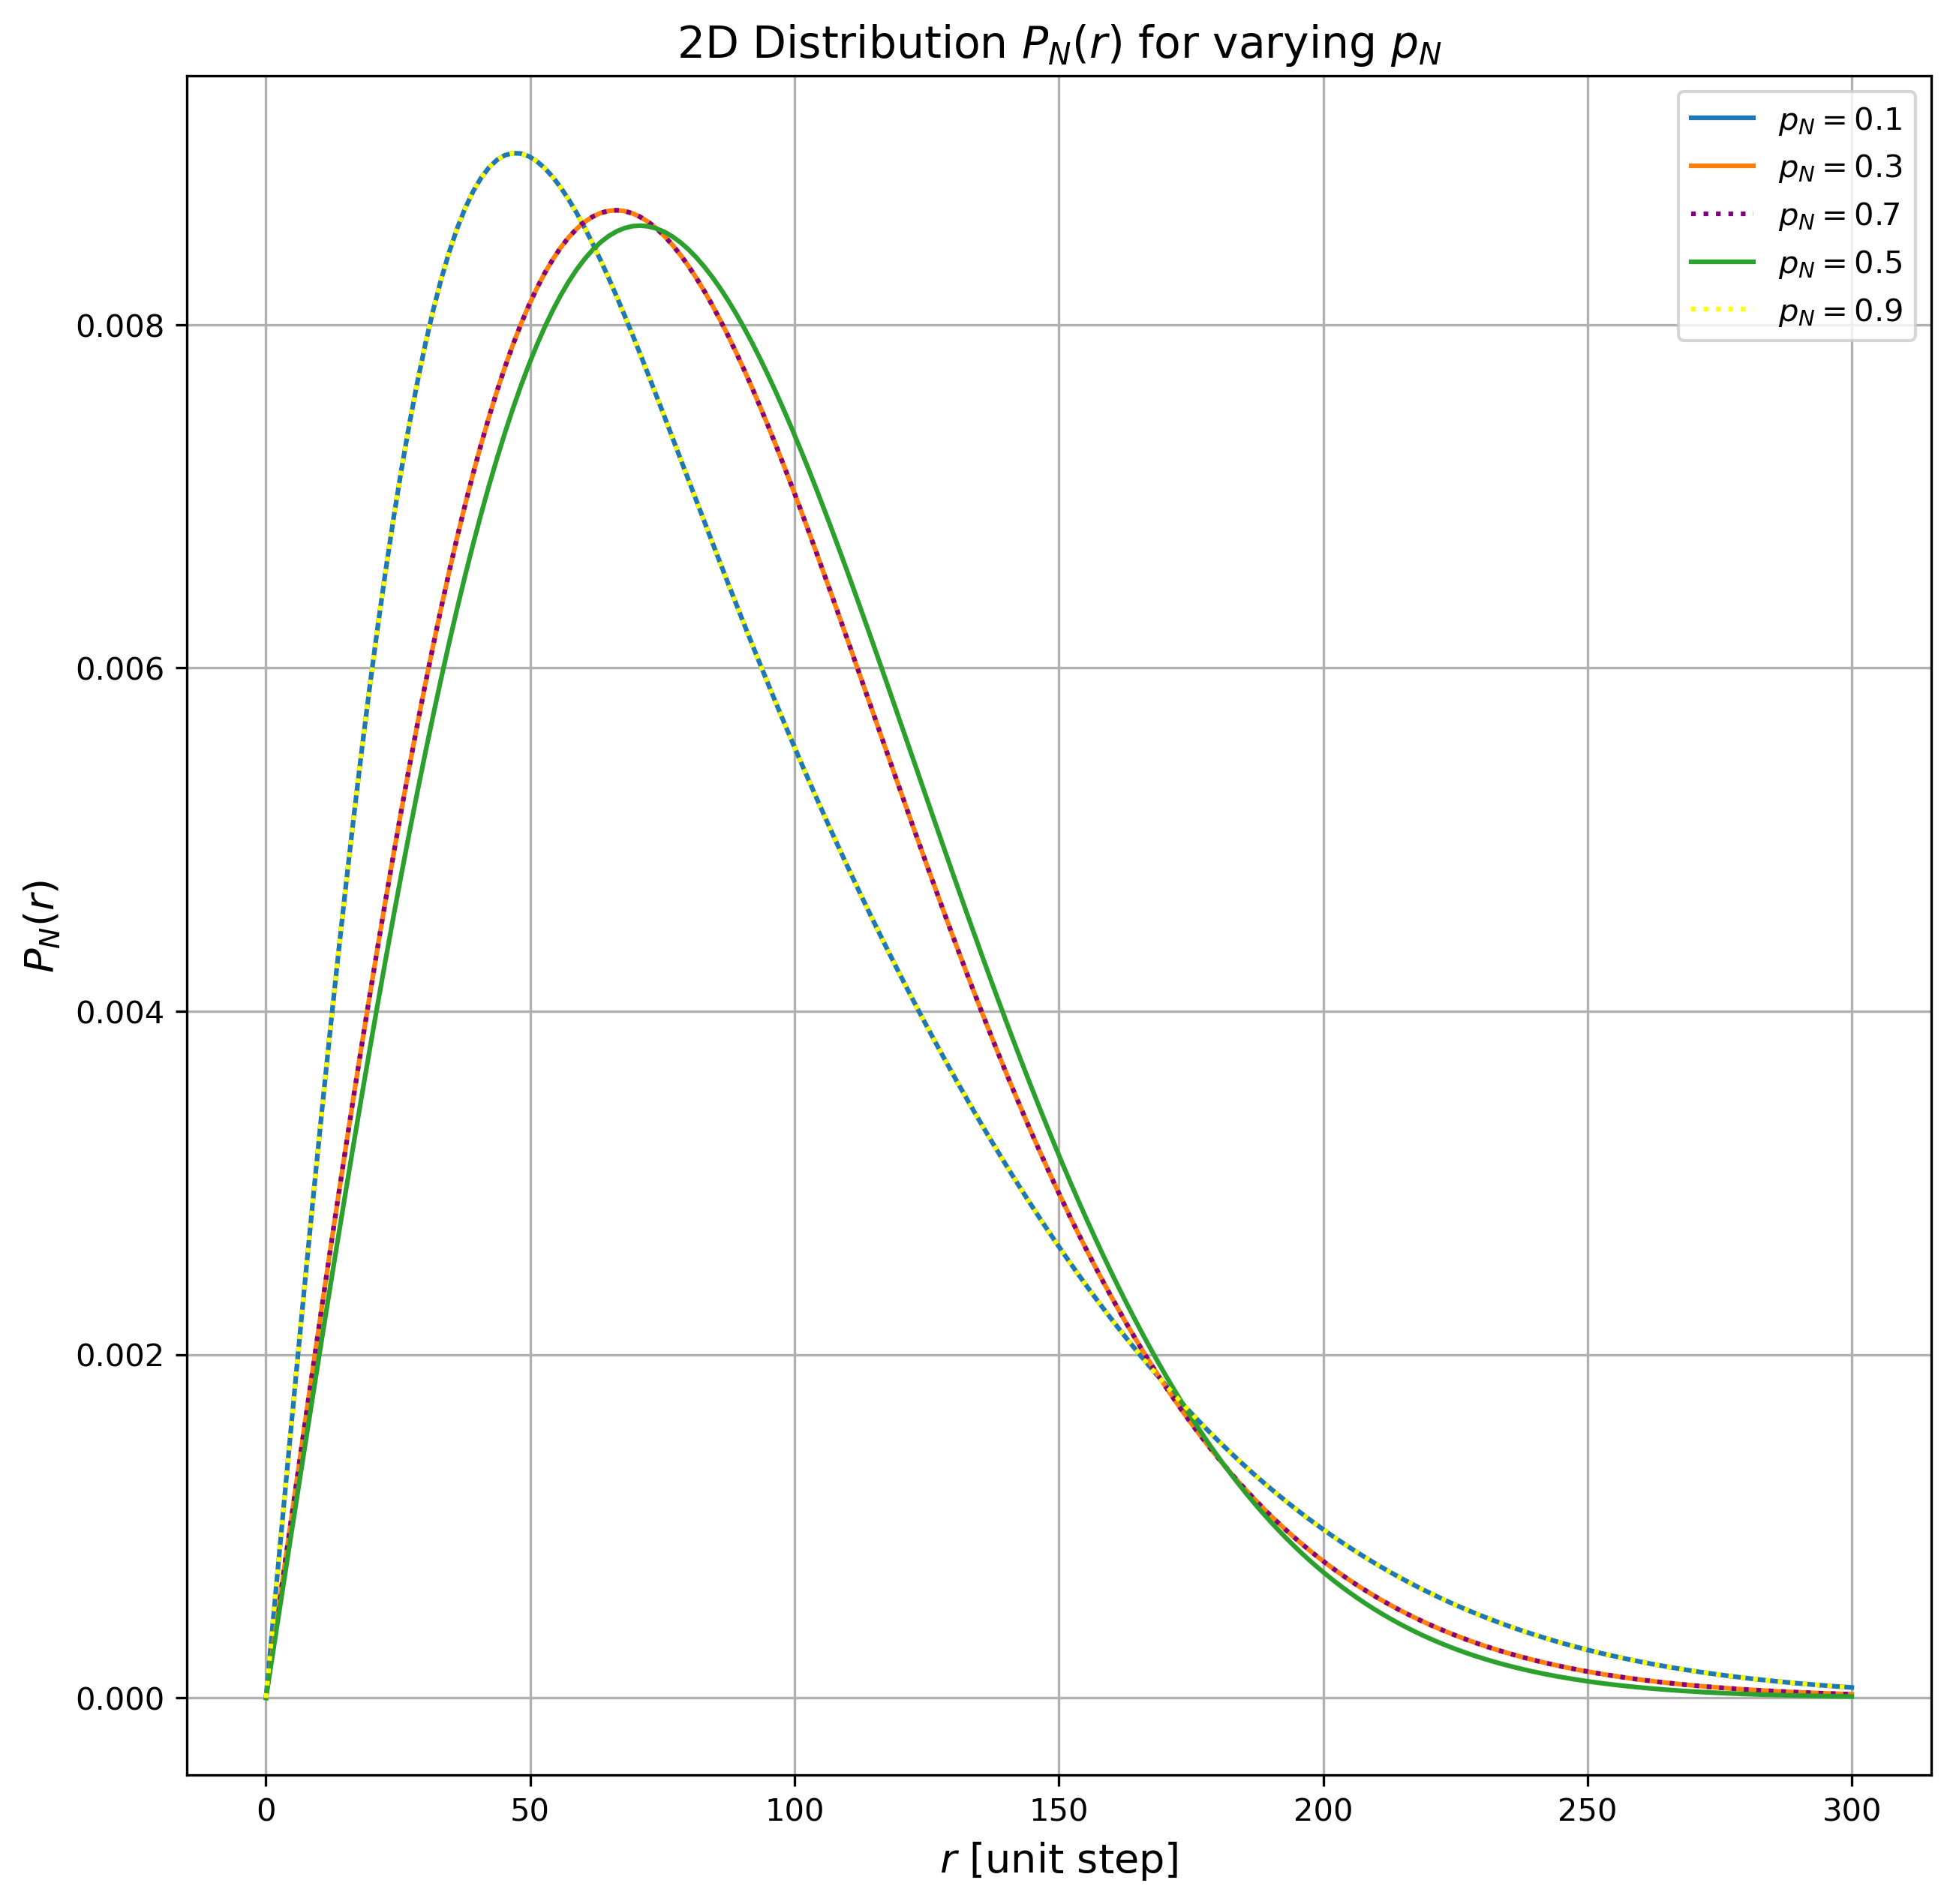

In [170]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Constants and parameters
N_z = 10000
N = 10000
p_x = 0.5
p_y = 0.5
p_z_vals = [0.1, 0.3, 0.7, 0.5, 0.9]  # Varying p_z for 1D
p_N_vals = [0.1, 0.3, 0.7, 0.5, 0.9]  # Varying p_N for 2D and 3D
r_vals = np.linspace(0, 300, 200)  # Range for r in 2D and 3D
z_vals = np.linspace(-8300, 8300, 700)  # Range for z in 1D
theta_vals = np.linspace(0, 2*np.pi, 200)  # Range for theta in 2D and 3D

# Task 1: P_Nz(z) with varying p_z
def P_Nz(z, p_z, N_z):
    A_z = 8 * np.pi * p_z * (1 - p_z)
    C_z = 8 * p_z * (1 - p_z)
    B_z = 2 * p_z - 1
    factor = 1 / np.sqrt(A_z * N_z)
    exponent = np.exp(-(z - N_z * B_z)**2 / (C_z * N_z))
    return factor * exponent

plt.figure(figsize=(10, 6), dpi=300)  # Increased resolution (300 DPI)
for p_z in p_z_vals:
    plt.plot(z_vals, P_Nz(z_vals, p_z, N_z), label=f"$p_z = {p_z}$")

plt.title(r'1D Distribution $P_{N_z}(z)$ for varying $p_z$', fontsize=14)
plt.xlabel(r'$z$ [unit step]', fontsize=13)
plt.ylabel(r'$P_{N_z}(z)$', fontsize=13)
plt.legend()
plt.grid(True)
plt.show()

# Task 2: P_N(r) with varying p_N (numerically integrated)
def P_N_r_integrand(theta, r, p_x, p_y, p_N, N):
    return np.exp(-(1/8)*((r * np.cos(theta) - N * p_N * (2 * p_x - 1))**2 / (p_x * (1 - p_x) * N * p_N) + 
                     (r * np.sin(theta) - N * (1 - p_N) * (2 * p_y - 1))**2 / (p_y * (1 - p_y) * N * (1 - p_N))))

def P_N_r(r, p_x, p_y, p_N, N):
    integral = np.zeros_like(r)
    for i, r_val in enumerate(r):
        integral[i], _ = quad(lambda theta: P_N_r_integrand(theta, r_val, p_x, p_y, p_N, N) * r_val, 0, 2 * np.pi)
    return integral / (8 * np.pi * np.sqrt((p_x * (1 - p_x) * N * p_N) * (p_y * (1 - p_y) * N * (1 - p_N))))

plt.figure(figsize=(10, 10), dpi=300)  # Increased resolution (300 DPI)
for p_N in p_N_vals:
    # Make the lines for p_N = 0.7 and p_N = 0.9 dashed
    if p_N == 0.9:
        plt.plot(r_vals, P_N_r(r_vals, p_x, p_y, p_N, N), label=f"$p_N = {p_N}$", color='yellow', linestyle=':')  # Yellow and dashed
    elif p_N == 0.7:
        plt.plot(r_vals, P_N_r(r_vals, p_x, p_y, p_N, N), label=f"$p_N = {p_N}$", color='purple', linestyle=':')  # Dashed for p_N = 0.7
    else:
        plt.plot(r_vals, P_N_r(r_vals, p_x, p_y, p_N, N), label=f"$p_N = {p_N}$",)

plt.title(r'2D Distribution $P_N(r)$ for varying $p_N$', fontsize=14)
plt.xlabel(r'$r$ [unit step]', fontsize=13)
plt.ylabel(r'$P_N(r)$', fontsize=13)
plt.legend()
plt.grid(True)
plt.show()

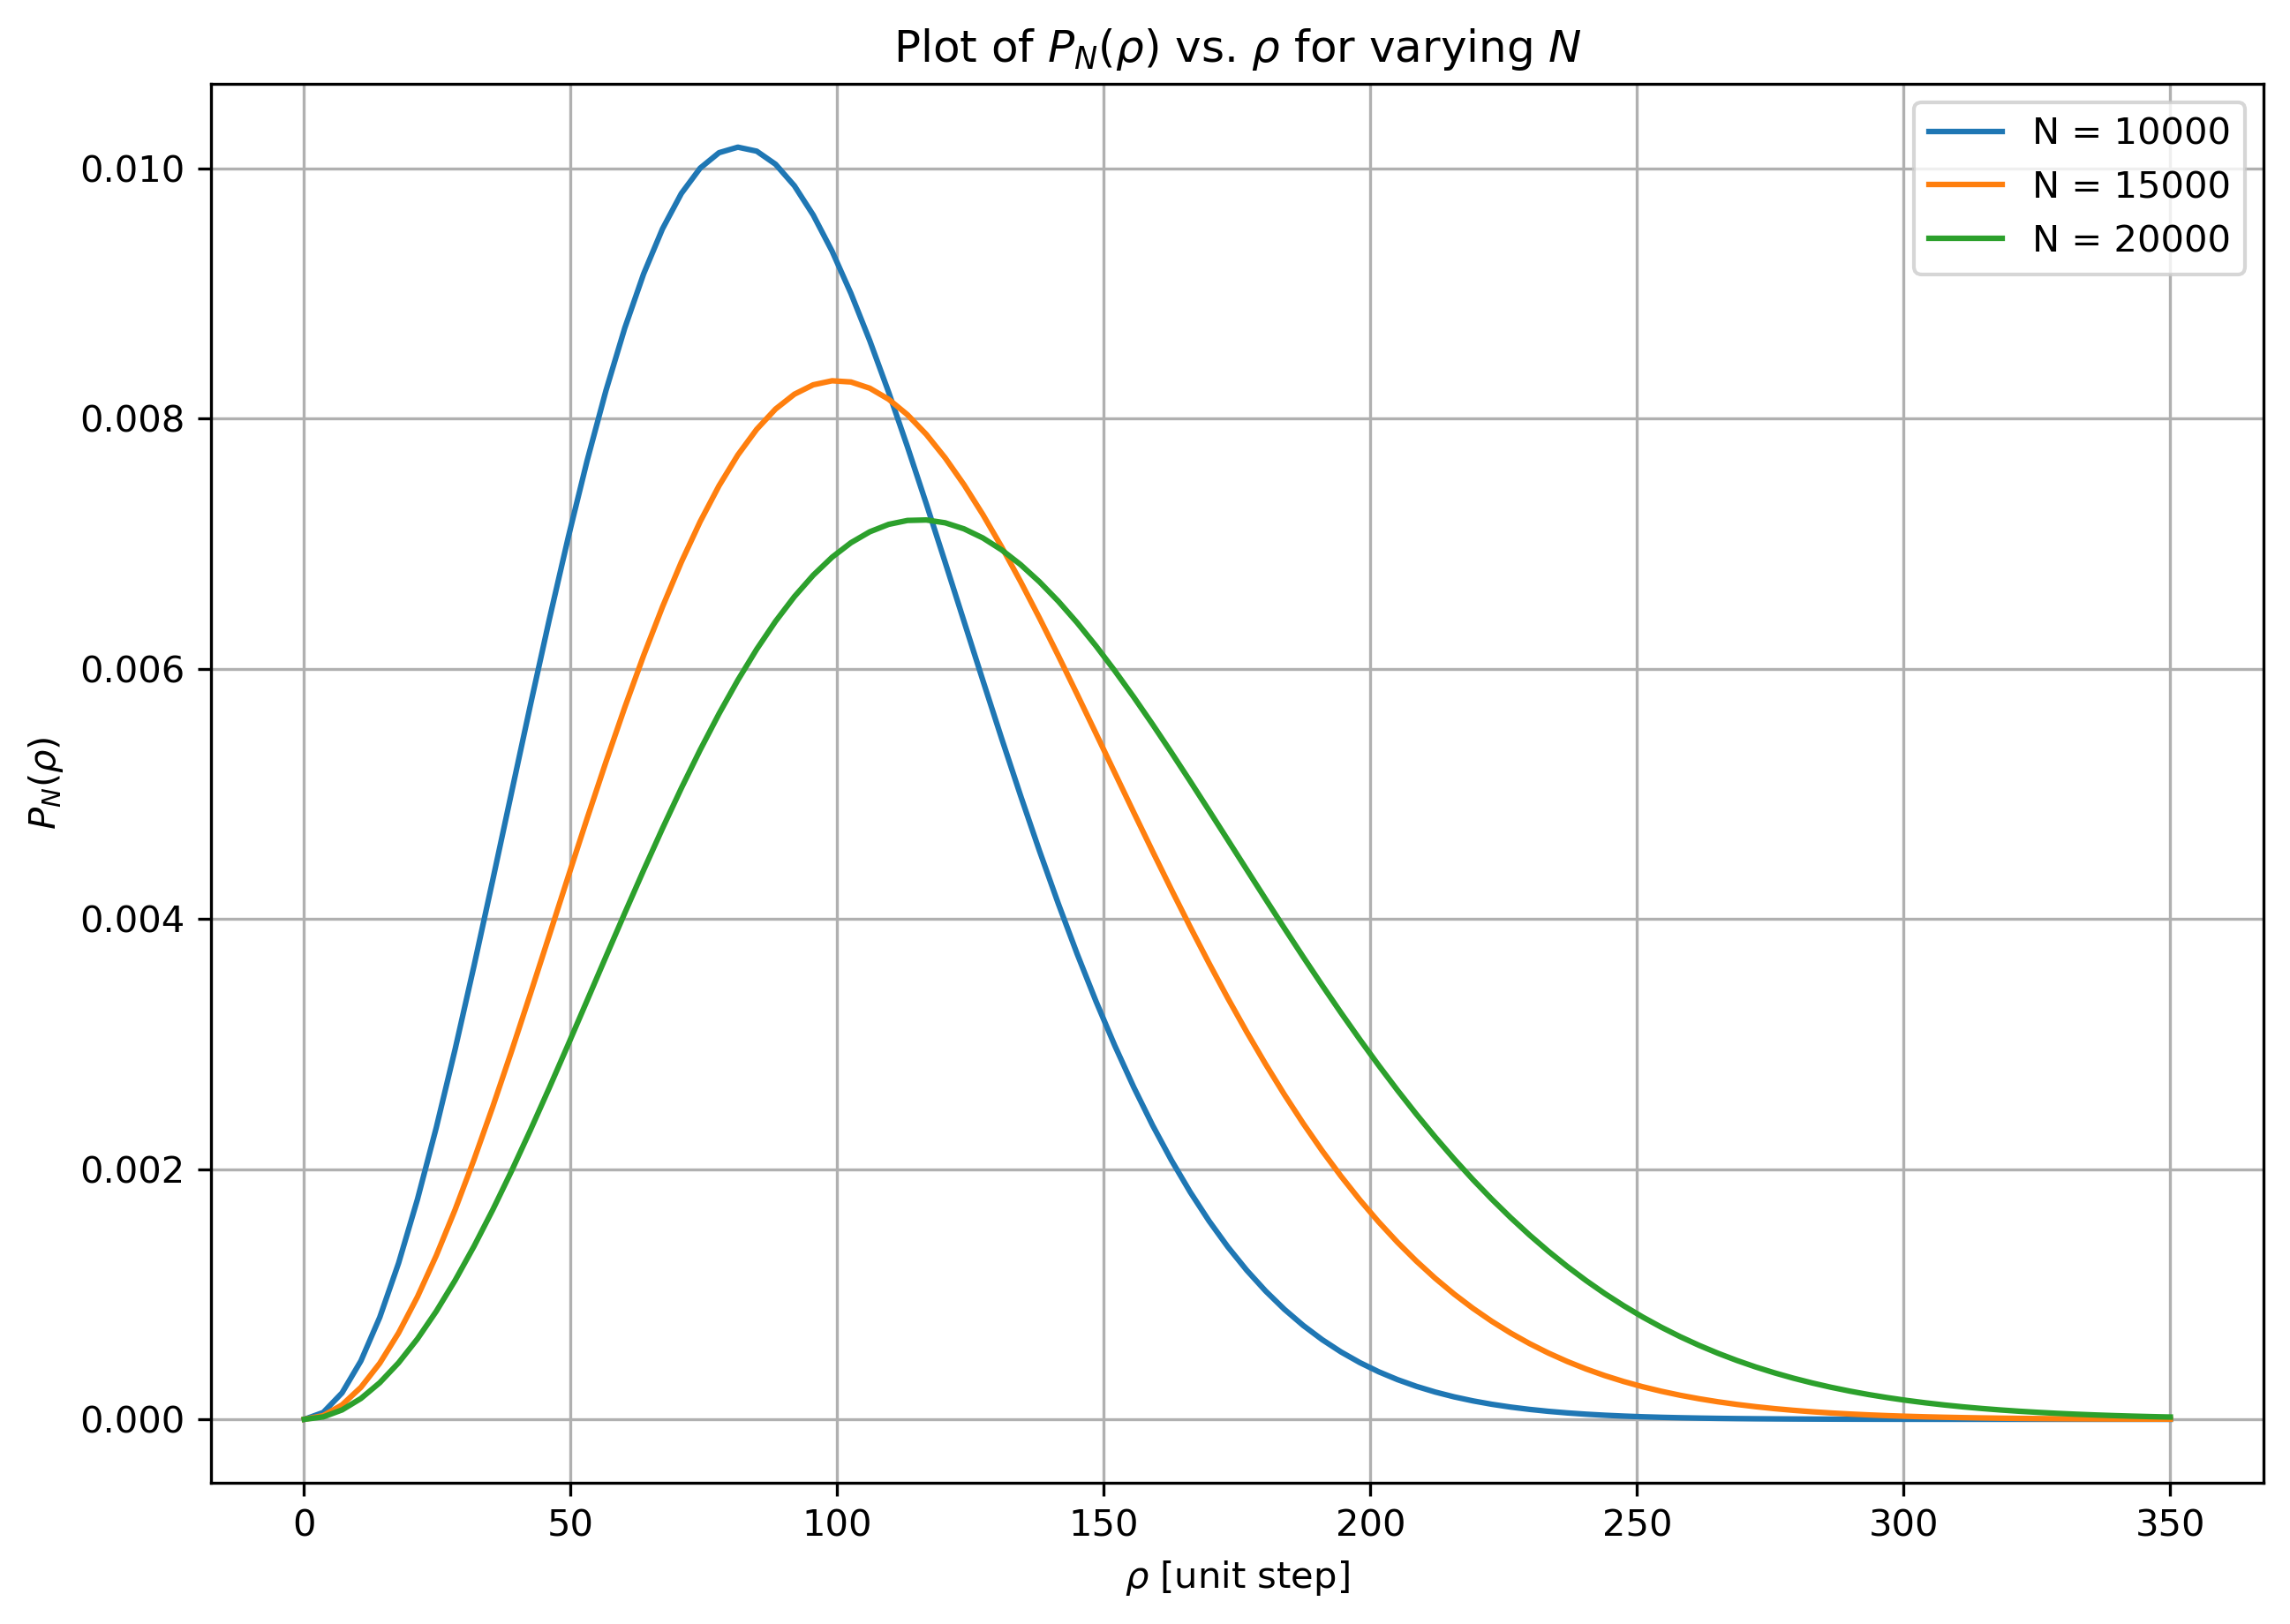

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import dblquad

# Constants
p_x = 0.5
p_y = 0.5
p_z = 0.5
k_N = 1/3
j_N = 1/3

# Parameters A, B, C (only dependent on probabilities p_x, p_y, p_z)
A_x = 8 * np.pi * p_x * (1 - p_x)
A_y = 8 * np.pi * p_y * (1 - p_y)
A_z = 8 * np.pi * p_z * (1 - p_z)
B_x = (2 * p_x - 1)
B_y = (2 * p_y - 1)
B_z = (2 * p_z - 1)
C_x = 8 * p_x * (1 - p_x)
C_y = 8 * p_y * (1 - p_y)
C_z = 8 * p_z * (1 - p_z)

# Define the integrand function for P_N(rho)
def integrand(phi, theta, rho, N):
    exp_term = np.exp(-((rho * np.sin(theta) * np.cos(phi) - N * k_N * B_x)**2 / (N * k_N * C_x) + 
                        (rho * np.sin(theta) * np.sin(phi) - N * j_N * B_y)**2 / (N * j_N * C_y) + 
                        (rho * np.cos(theta) - N * (1 - k_N - j_N) * B_z)**2 / (N * (1 - k_N - j_N) * C_z)))
    return (rho**2 * exp_term * np.sin(theta)) / np.sqrt(A_x * N * k_N * A_y * N * j_N * A_z * N * (1 - k_N - j_N))

# Define a function to integrate P_N(rho) over phi and theta
def P_N(rho, N):
    integral, _ = dblquad(integrand, 0, np.pi, lambda _: 0, lambda _: 2 * np.pi, args=(rho, N))
    return integral

# Values for N
N_vals = [10000, 15000, 20000]

# Compute and plot P_N(rho) for each N
plt.figure(figsize=(10, 7), dpi=300)

for N in N_vals:
    rho_vals = np.linspace(0.1, 350, 100)  # rho from 0.1 to 350
    P_N_vals = np.array([P_N(rho, N) for rho in rho_vals])
    plt.plot(rho_vals, P_N_vals, label=f'N = {N}')

# Plot details
plt.title(r'Plot of $P_N(\rho)$ vs. $\rho$ for varying $N$')
plt.xlabel(r'$\rho$ [unit step]')
plt.ylabel(r'$P_N(\rho)$')
plt.grid(True)
plt.legend()
plt.show()

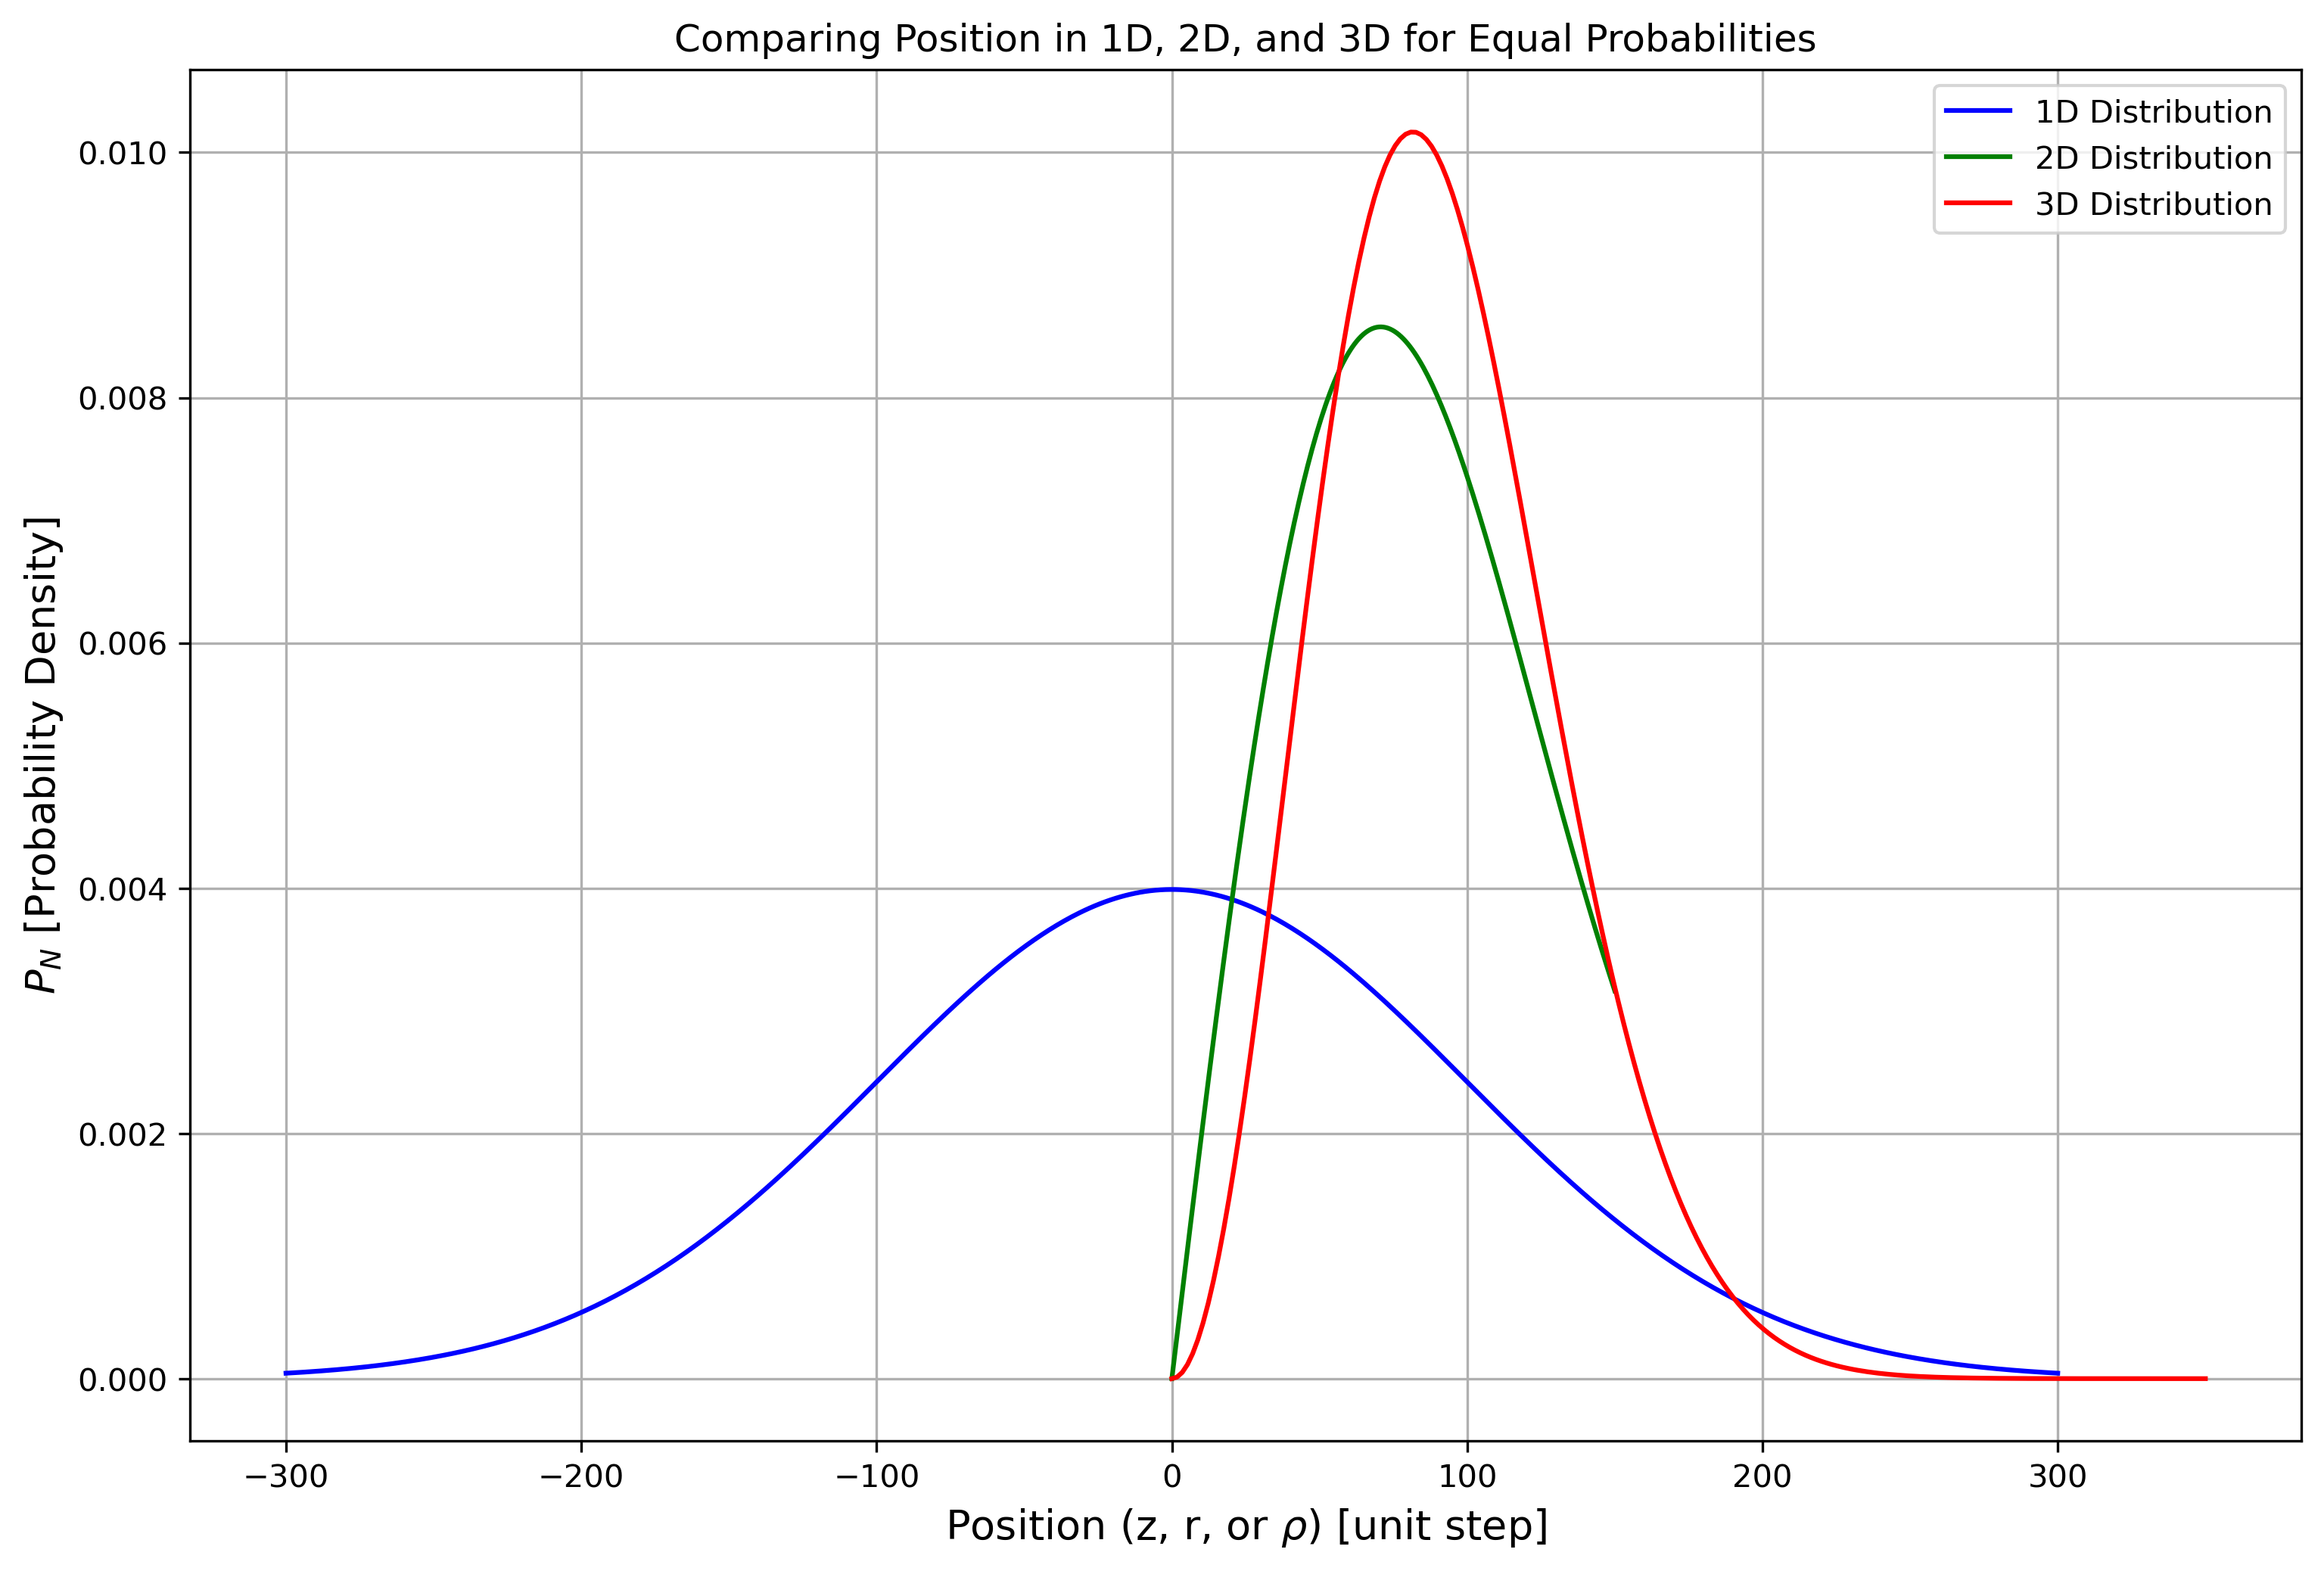

In [102]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad, dblquad

# Constants for equal probabilities
p_x = 0.5
p_y = 0.5
p_z = 0.5

# Parameters A, B, C for 1D, 2D, and 3D distributions
A_x = 8 * np.pi * p_x * (1 - p_x)
A_y = 8 * np.pi * p_y * (1 - p_y)
A_z = 8 * np.pi * p_z * (1 - p_z)
B_x = (2 * p_x - 1)
B_y = (2 * p_y - 1)
B_z = (2 * p_z - 1)
C_x = 8 * p_x * (1 - p_x)
C_y = 8 * p_y * (1 - p_y)
C_z = 8 * p_z * (1 - p_z)

# 1D distribution P_Nz(z)
def P_Nz(z, p_z, N_z):
    A_z = 8 * np.pi * p_z * (1 - p_z)
    C_z = 8 * p_z * (1 - p_z)
    B_z = 2 * p_z - 1
    factor = 1 / np.sqrt(A_z * N_z)
    exponent = np.exp(-(z - N_z * B_z)**2 / (C_z * N_z))
    return factor * exponent

# 2D distribution P_N(r)
def P_N_r_integrand(theta, r, p_x, p_y, p_N, N):
    return np.exp(-(1/8)*((r * np.cos(theta) - N * p_N * (2 * p_x - 1))**2 / (p_x * (1 - p_x) * N * p_N) + 
                     (r * np.sin(theta) - N * (1 - p_N) * (2 * p_y - 1))**2 / (p_y * (1 - p_y) * N * (1 - p_N))))

def P_N_r(r, p_x, p_y, p_N, N):
    integral = np.zeros_like(r)
    for i, r_val in enumerate(r):
        integral[i], _ = quad(lambda theta: P_N_r_integrand(theta, r_val, p_x, p_y, p_N, N) * r_val, 0, 2 * np.pi)
    return integral / (8 * np.pi * np.sqrt((p_x * (1 - p_x) * N * p_N) * (p_y * (1 - p_y) * N * (1 - p_N))))

# 3D distribution P_N(rho)
def integrand(phi, theta, rho, N):
    exp_term = np.exp(-((rho * np.sin(theta) * np.cos(phi) - N * k_N * B_x)**2 / (N * k_N * C_x) + 
                        (rho * np.sin(theta) * np.sin(phi) - N * j_N * B_y)**2 / (N * j_N * C_y) + 
                        (rho * np.cos(theta) - N * (1 - k_N - j_N) * B_z)**2 / (N * (1 - k_N - j_N) * C_z)))
    return (rho**2 * exp_term * np.sin(theta)) / np.sqrt(A_x * N * k_N * A_y * N * j_N * A_z * N * (1 - k_N - j_N))

def P_N_3D(rho, N):
    integral, _ = dblquad(integrand, 0, np.pi, lambda _: 0, lambda _: 2 * np.pi, args=(rho, N))
    return integral

# Plotting
plt.figure(figsize=(12, 8), dpi=300)

# 1D Distribution
N= 10000
z_vals = np.linspace(-300, 300, 700)  # Range for z in 1D
for p_z in [0.5]:  # Equal probability in 1D
    plt.plot(z_vals, P_Nz(z_vals, p_z, N), label="1D Distribution", color='blue', linestyle='-')

# 2D Distribution
r_vals = np.linspace(0, 150, 200)  # Range for r in 2D
for p_N in [0.5]:  # Equal probability in 2D
    P_N_vals_2D = P_N_r(r_vals, p_x, p_y, p_N, N)
    plt.plot(r_vals, P_N_vals_2D, label="2D Distribution", color='green', linestyle='-')

# 3D Distribution
rho_vals = np.linspace(0, 350, 200)  # Range for rho in 3D
for p_x, p_y, p_z in [(0.5, 0.5, 0.5)]:
    P_N_vals_3D = np.array([P_N_3D(rho, N) for rho in rho_vals])
    plt.plot(rho_vals, P_N_vals_3D, label="3D Distribution", color='red', linestyle='-')

# Plot details
plt.title(r'Comparing Position in 1D, 2D, and 3D for Equal Probabilities')
plt.xlabel(r'Position (z, r, or $\rho$) [unit step]', fontsize=13)
plt.ylabel(r'$P_N$ [Probability Density]', fontsize=13)
plt.grid(True)
plt.legend()
plt.show()

In [217]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

# Parameters
N = 2000          # Number of particles
steps = 10000      # Number of steps per particle
time_per_step = 1  # Time per step (unit time)
step_length = 1    # Step length (unit length)

# Initialize arrays
positions = np.zeros((N, steps, 2))  # Array to store particle positions (x, y) for each step
displacements_squared = np.zeros((N, steps))  # Array to store displacement squared (r^2) for each particle

# Simulate the Brownian motion
for i in range(N):
    x, y = 0, 0  # Starting at the origin
    for t in range(steps):
        # Randomly choose whether to move in the x-direction or y-direction (but not both)
        direction = np.random.choice(['x', 'y'])  # Randomly choose either 'x' or 'y'
        
        # Update position based on the direction
        if direction == 'x':
            direction_x = np.random.choice([-1, 1])  # Randomly choose direction for x
            x += direction_x * step_length  # Update x position
        else:
            direction_y = np.random.choice([-1, 1])  # Randomly choose direction for y
            y += direction_y * step_length  # Update y position
        
        # Store the positions
        positions[i, t, 0] = x
        positions[i, t, 1] = y
        
        # Calculate displacement squared (r^2)
        displacements_squared[i, t] = x**2 + y**2

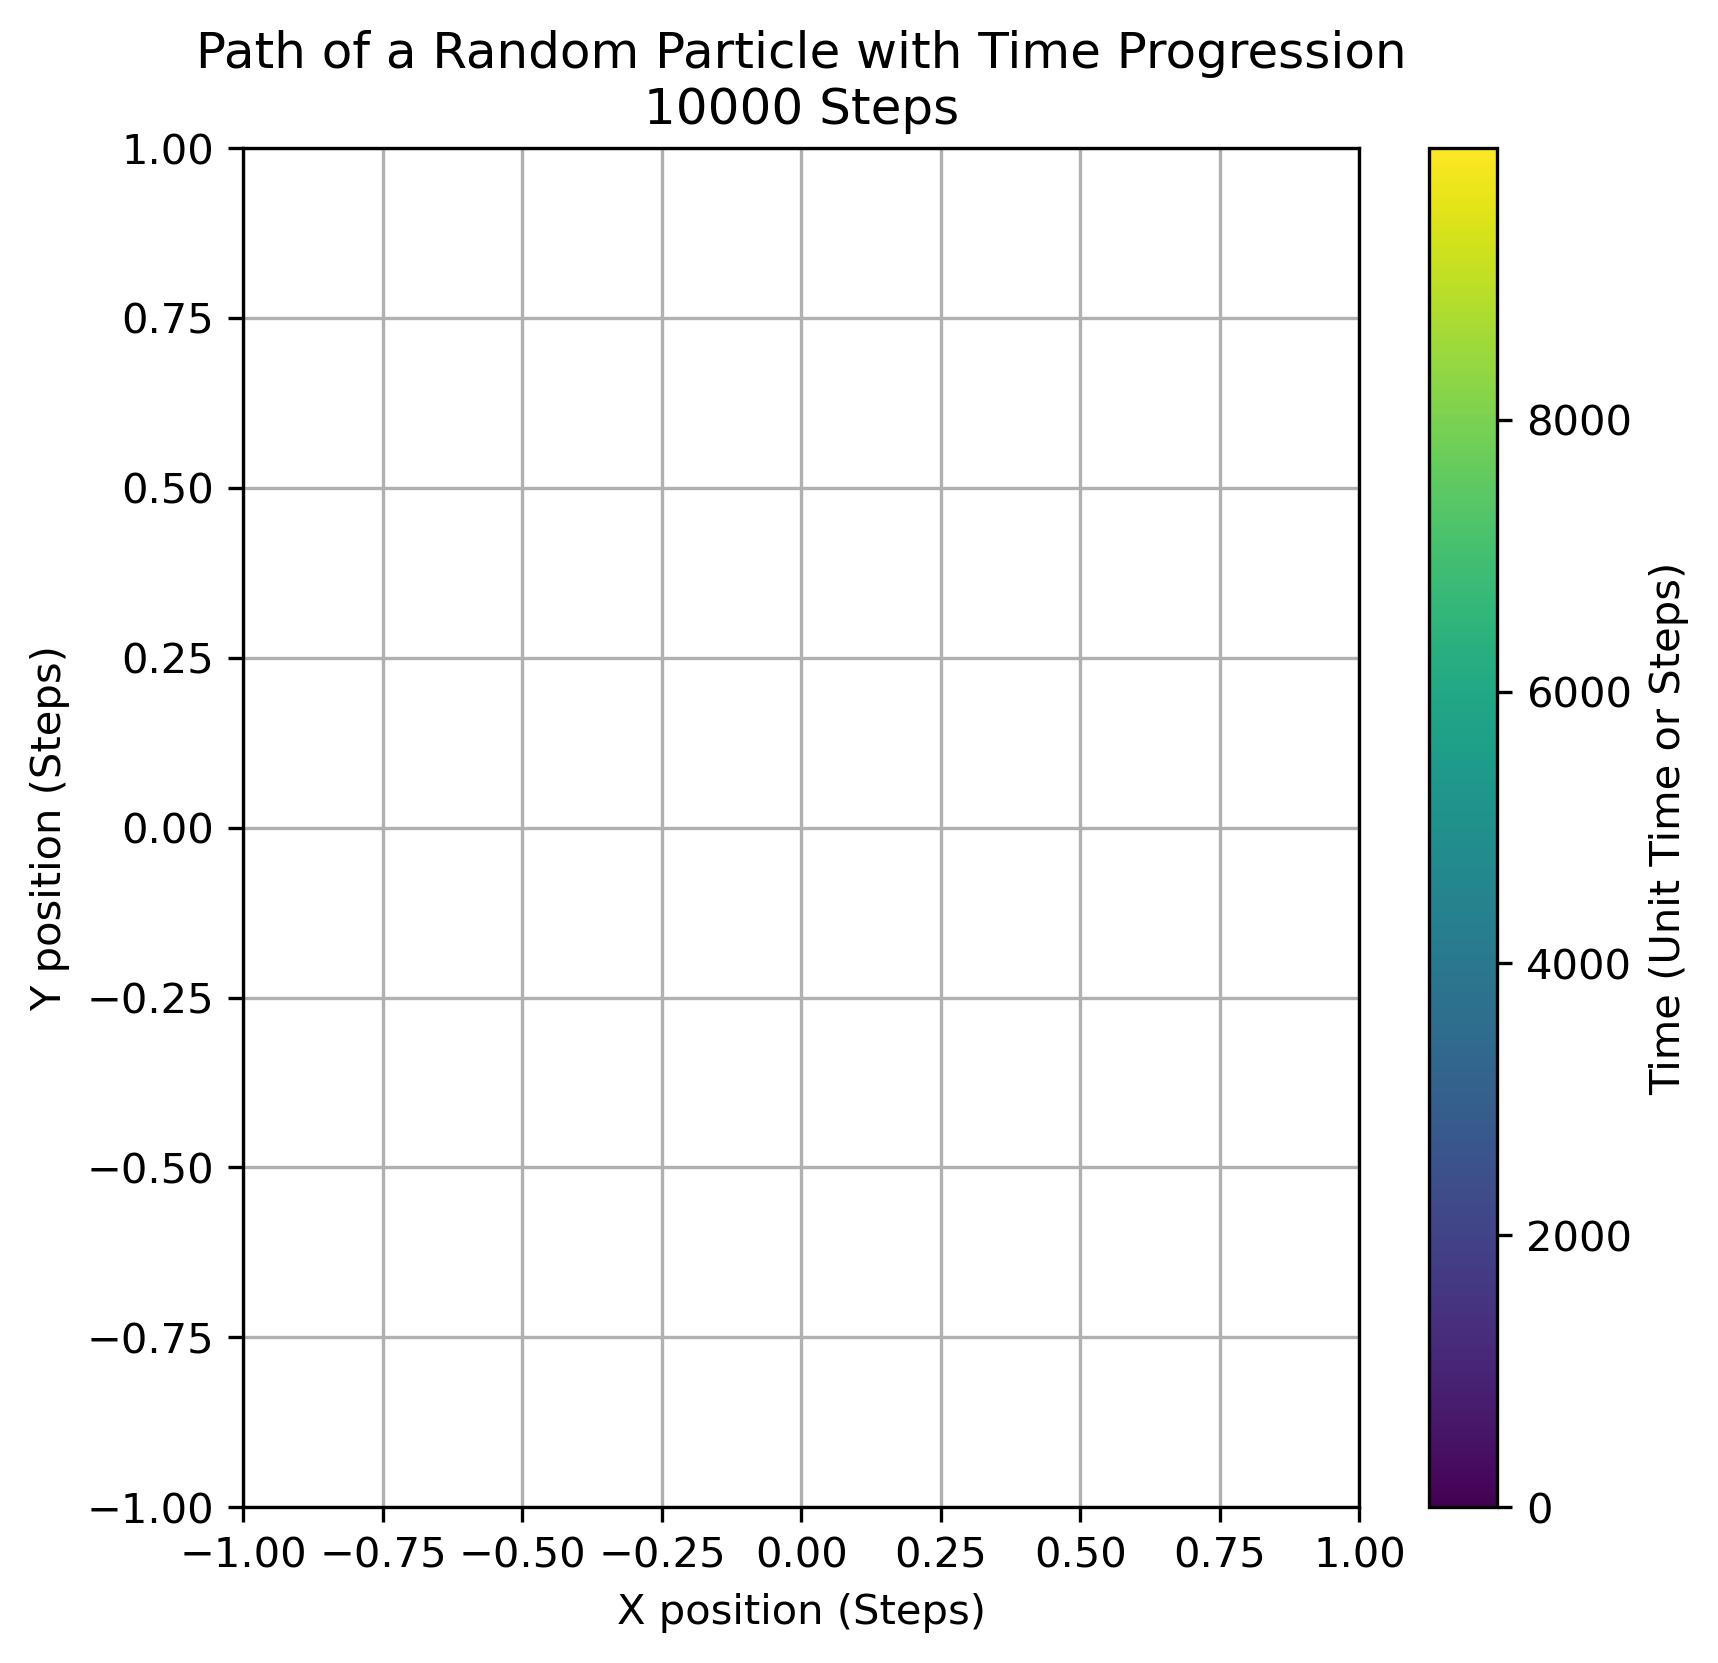

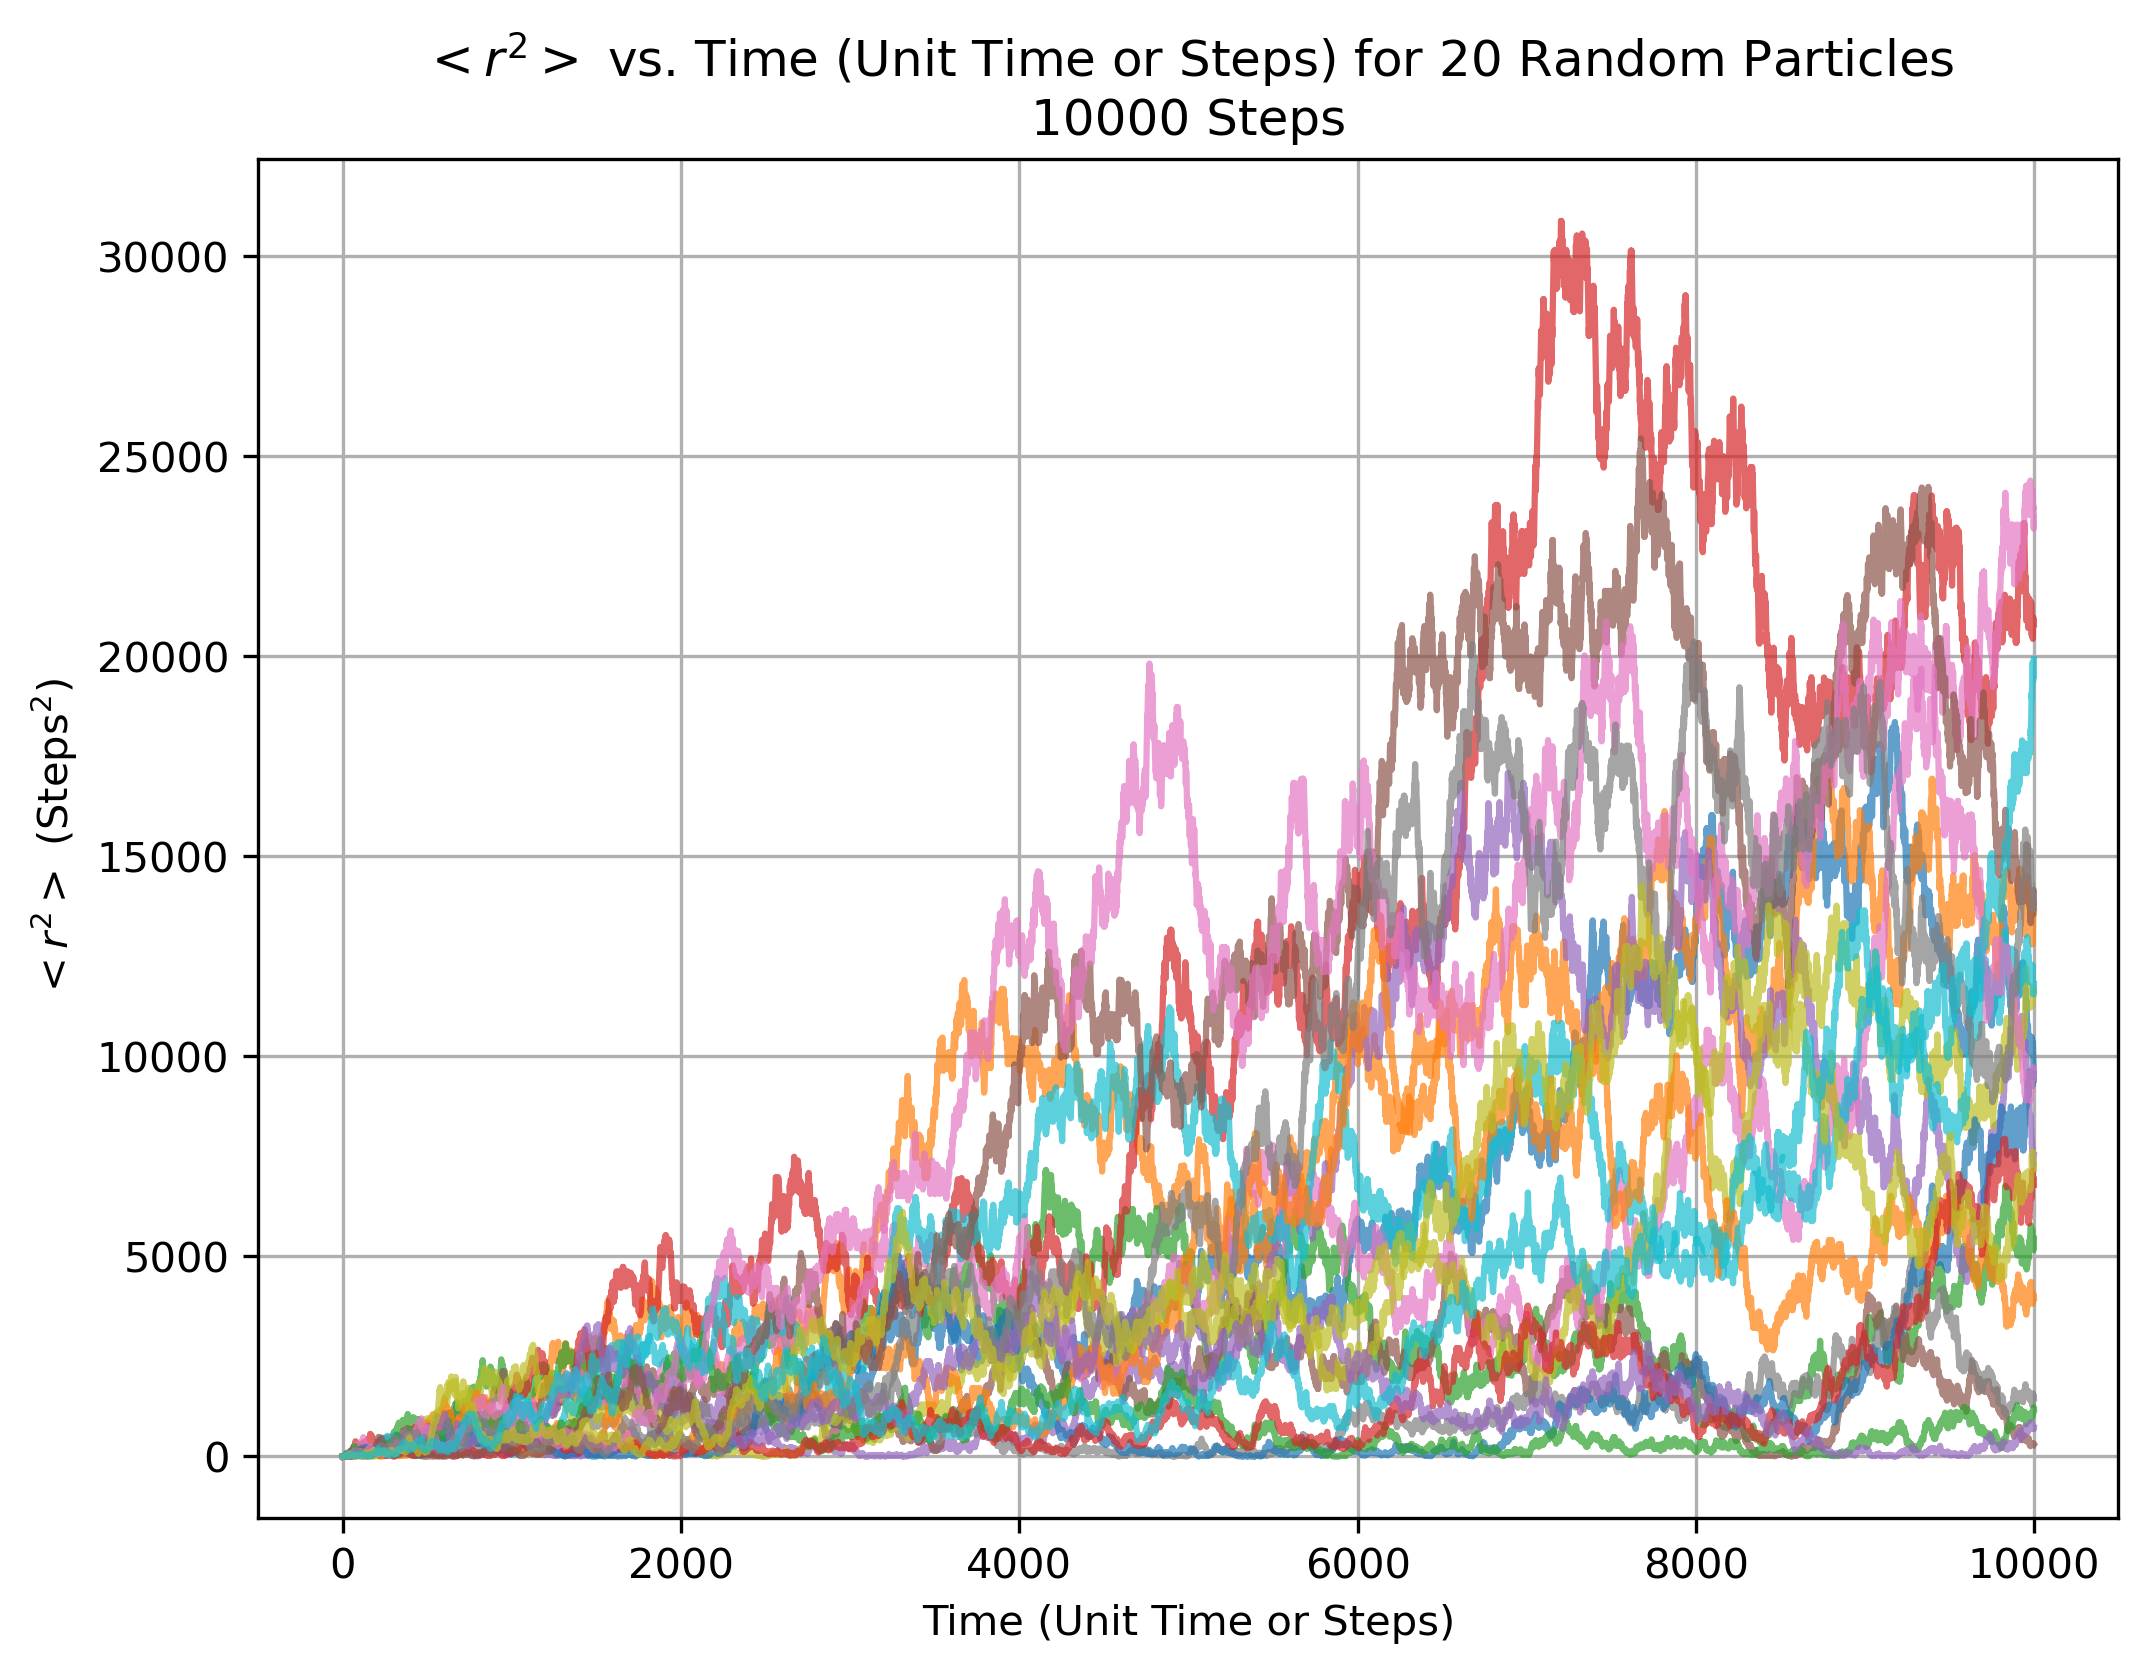

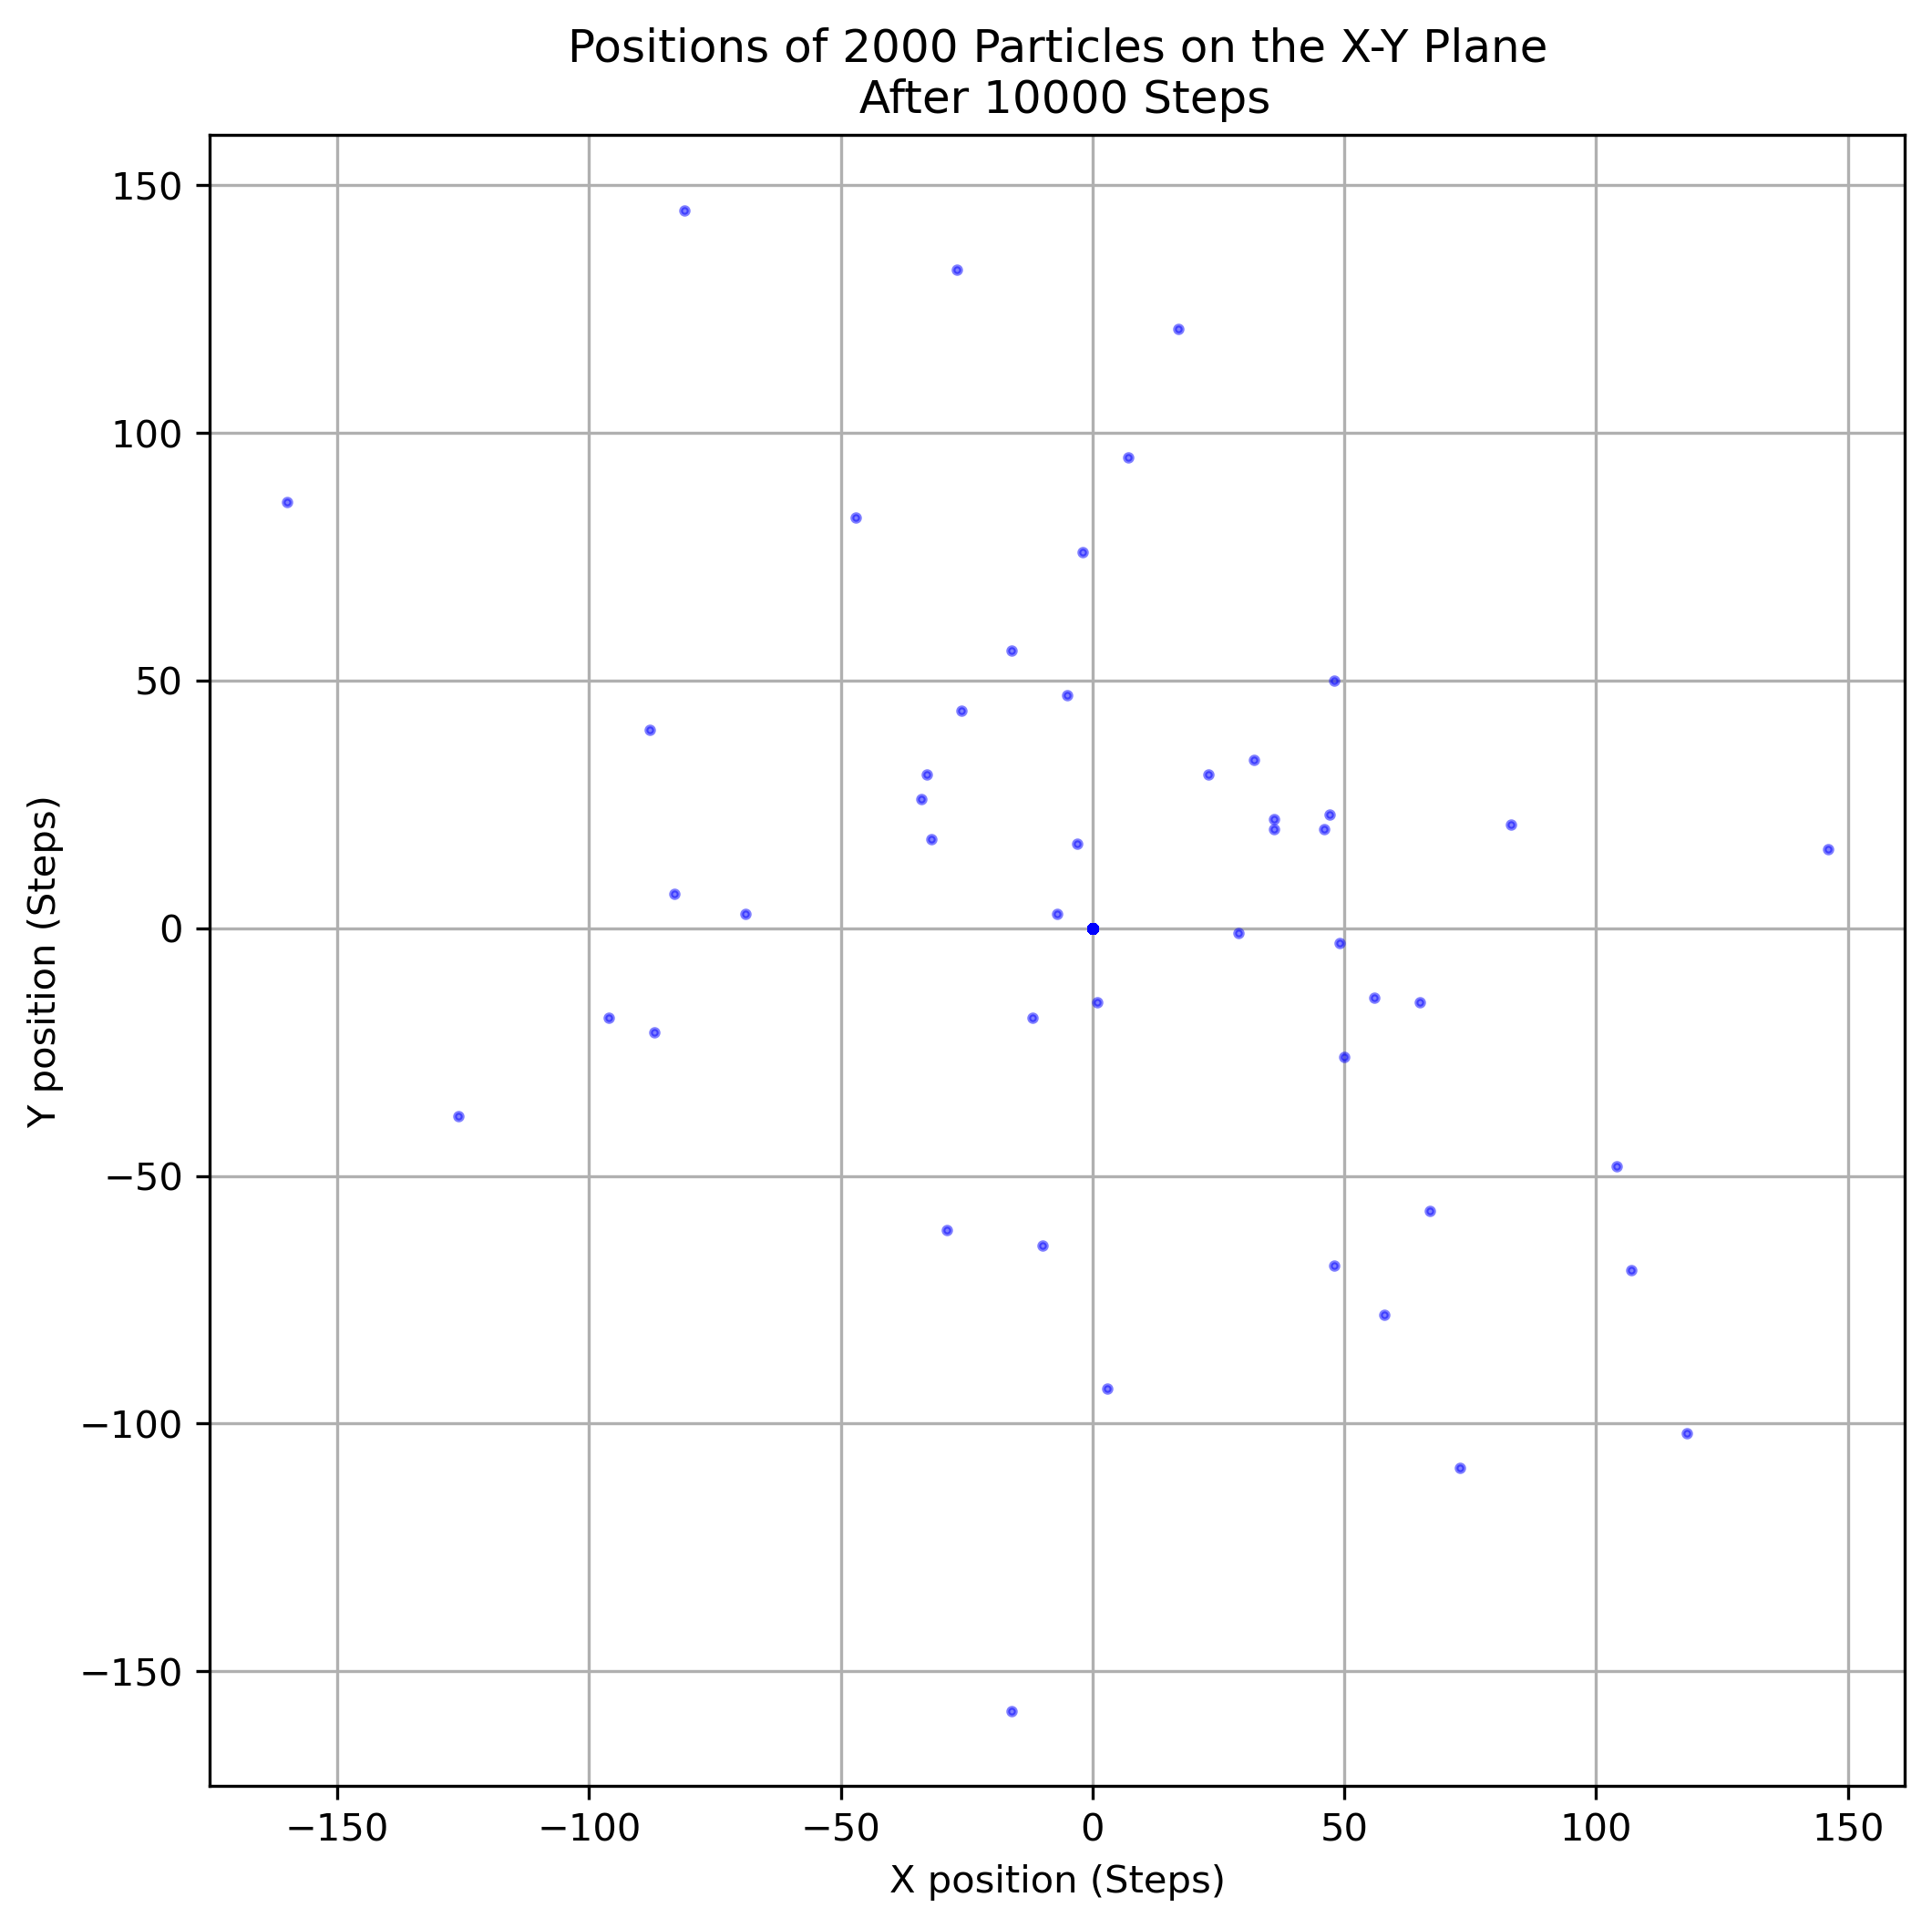

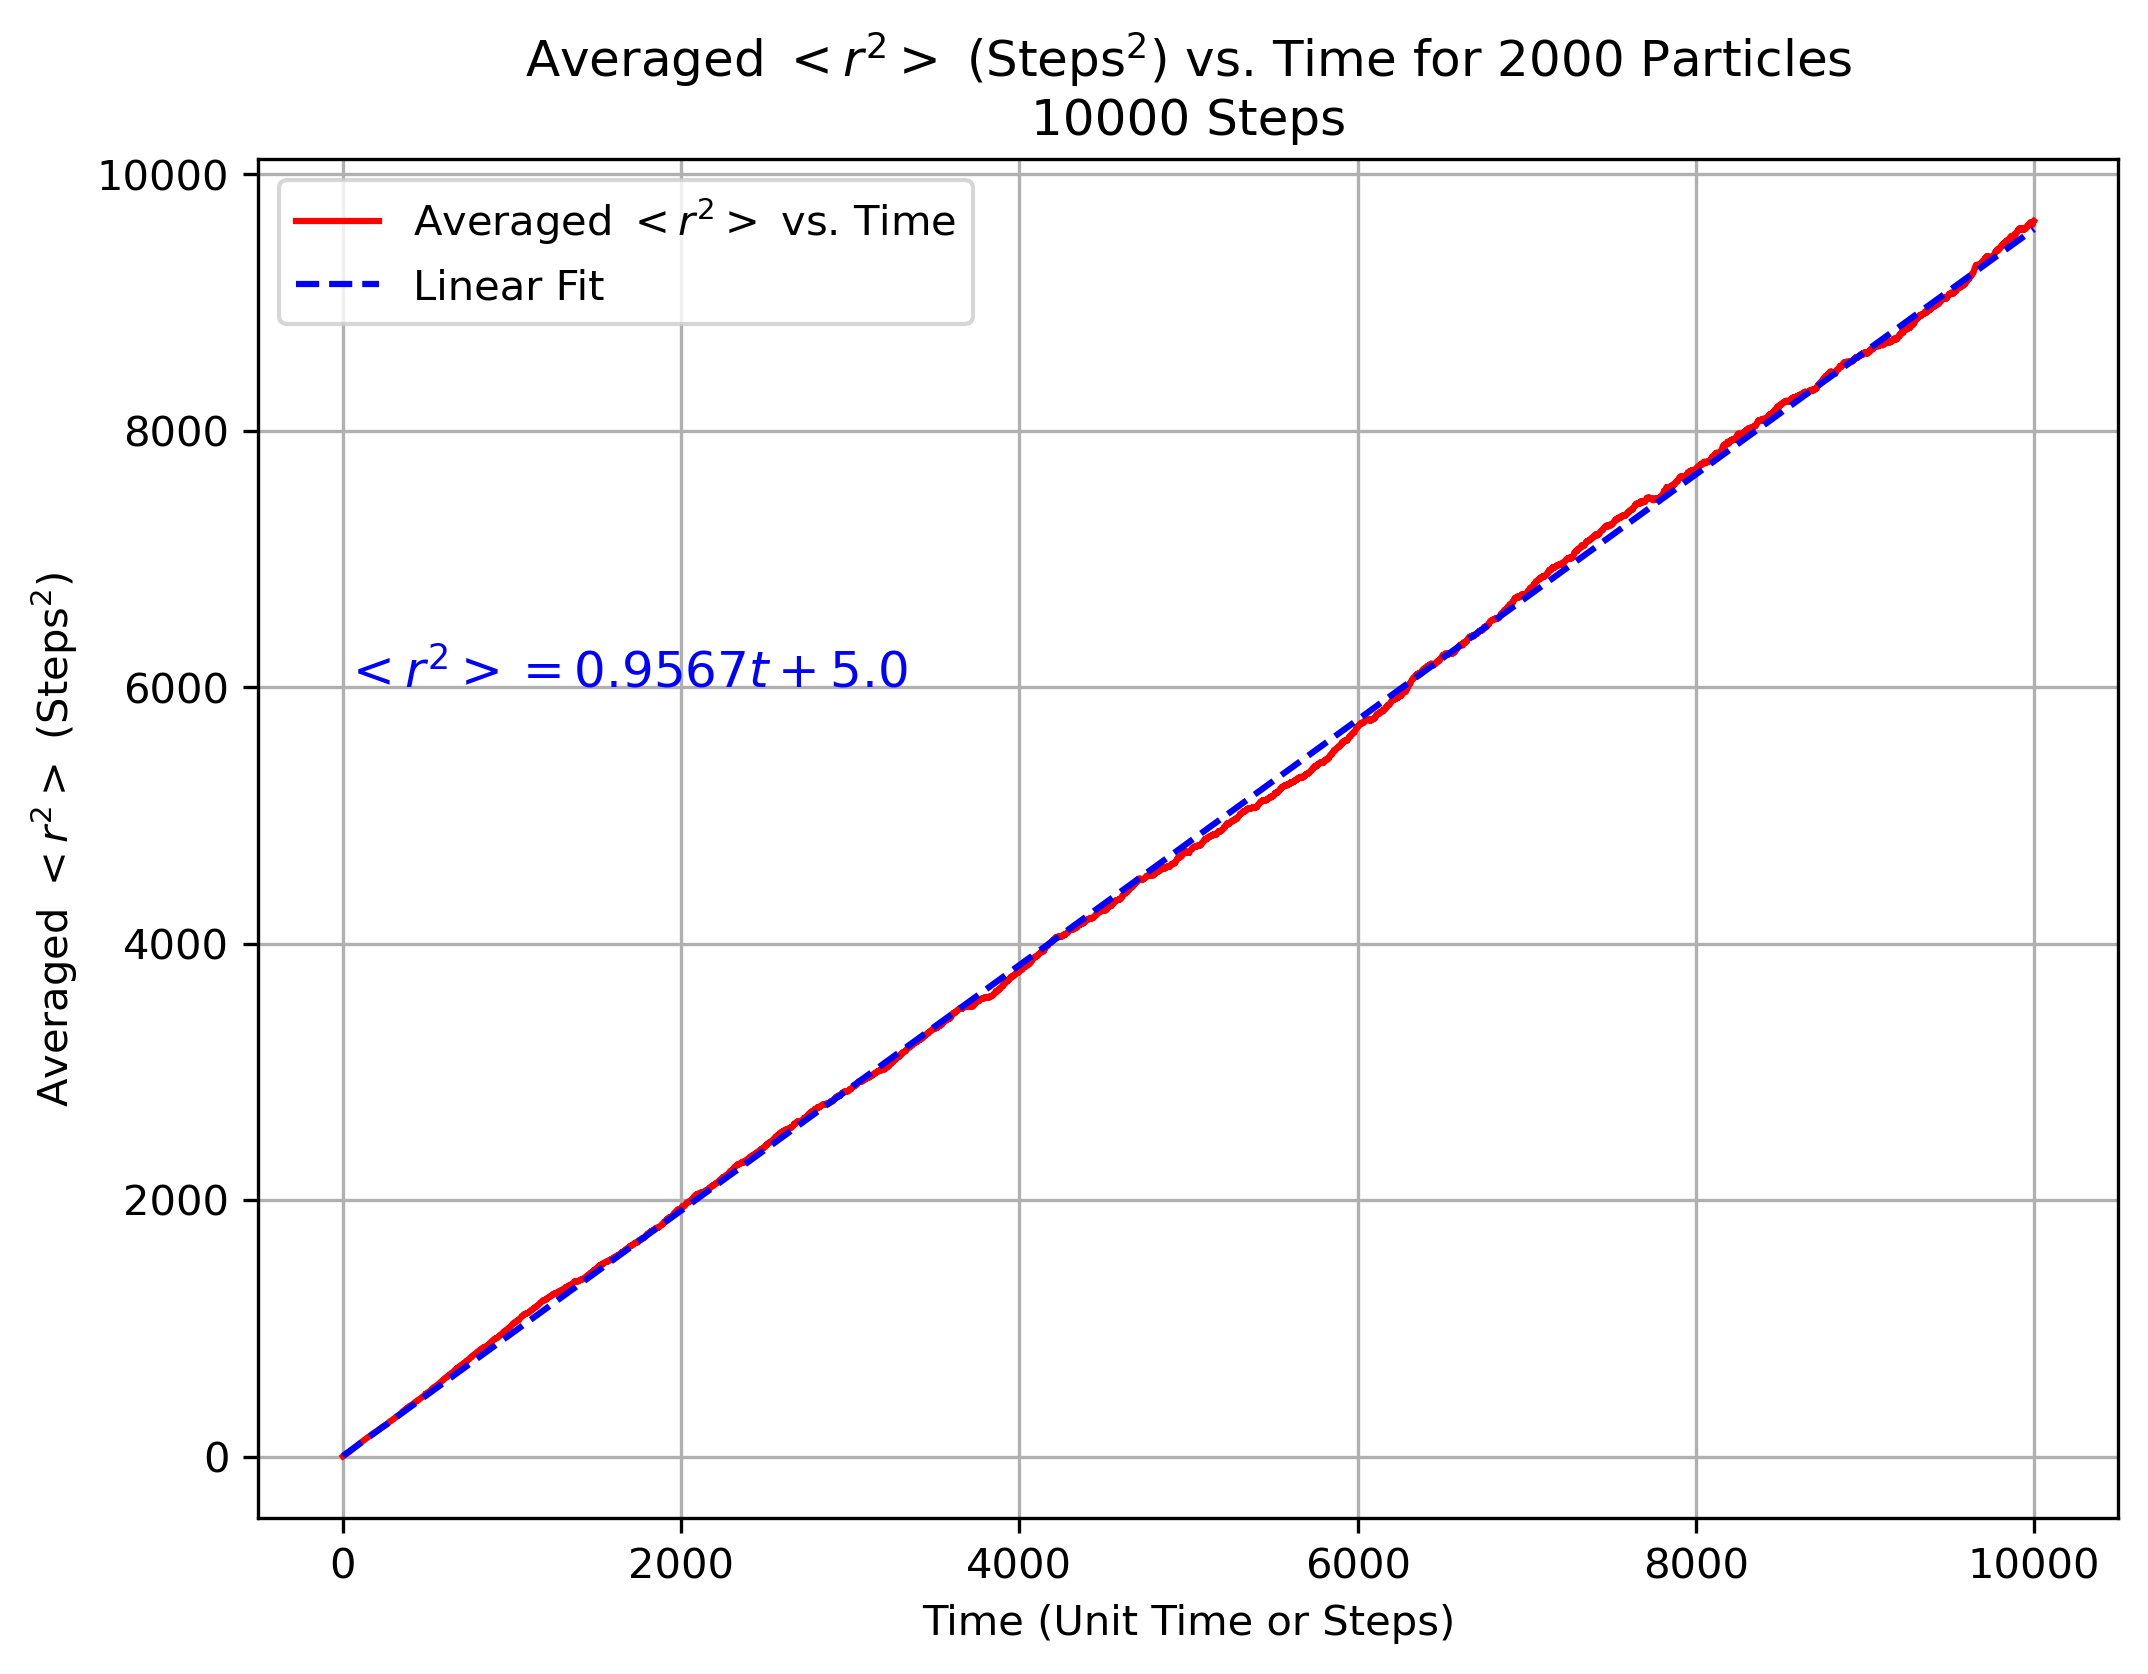

In [216]:
# Plot path of a random particle with a color gradient (continuous line)
random_particle_index = np.random.randint(N)
fig, ax = plt.subplots(figsize=(6, 6),dpi=300)

# Create a line collection for the path of the random particle
segments = []
for t in range(steps - 1):
    # Create a segment between consecutive points
    segment = [[positions[random_particle_index, t, 0], positions[random_particle_index, t, 1]],
               [positions[random_particle_index, t + 1, 0], positions[random_particle_index, t + 1, 1]]]
    segments.append(segment)

# Create LineCollection and apply color mapping based on time
line_segments = LineCollection(segments, cmap='viridis', array=np.arange(steps - 1), linewidth=2)

# Add the LineCollection to the plot
ax.add_collection(line_segments)
ax.autoscale()
ax.set_xlim(np.min(positions[random_particle_index, :, 0]) - 1, np.max(positions[random_particle_index, :, 0]) + 1)
ax.set_ylim(np.min(positions[random_particle_index, :, 1]) - 1, np.max(positions[random_particle_index, :, 1]) + 1)

# Add color bar to indicate time progression
plt.colorbar(line_segments, ax=ax, label='Time (Unit Time or Steps)')

# Set plot labels and title
plt.title(f"Path of a Random Particle with Time Progression\n{steps} Steps")
plt.xlabel("X position (Steps)")
plt.ylabel("Y position (Steps)")
plt.grid(True)
plt.show()

# Plot <r^2> vs. time for 20 random particles
plt.figure(figsize=(8, 6),dpi=300)
for i in range(20):
    plt.plot(np.arange(steps), displacements_squared[i, :], alpha=0.7)
plt.title(f"$<r^2>$ vs. Time (Unit Time or Steps) for 20 Random Particles\n{steps} Steps")
plt.xlabel("Time (Unit Time or Steps)")
plt.ylabel("$<r^2>$ (Steps$^2$)")
plt.grid(True)
plt.show()

# Plot positions of 100 particles on the x-y plane (adjusted to N = 100)
plt.figure(figsize=(8, 8),dpi=300)
for i in range(2000):  # Loop only up to 100 particles for visualization
    plt.plot(positions[i, -1, 0], positions[i, -1, 1], 'bo', alpha=0.5, markersize=2)
plt.title(f"Positions of {N} Particles on the X-Y Plane\n After {steps} Steps")
plt.xlabel("X position (Steps)")
plt.ylabel("Y position (Steps)")
plt.grid(True)
plt.show()

# Plot averaged <r^2> vs. time for N particles and include a linear fit
avg_displacement_squared = np.mean(displacements_squared, axis=0)

# Perform linear fit to the averaged displacement squared data
time = np.arange(steps)
fit_params = np.polyfit(time, avg_displacement_squared, 1)  # Fit a first degree polynomial (linear fit)
linear_fit = np.polyval(fit_params, time)  # Evaluate the polynomial at the given time steps

# Extract the slope (m) and intercept (b) from the linear fit
slope, intercept = fit_params

# Format the equation for the linear fit
equation = f"$<r^2> = {slope:.4}t + {intercept:.2}$"

# Plot the averaged <r^2> vs. time with linear fit
plt.figure(figsize=(8, 6),dpi=300)
plt.plot(time, avg_displacement_squared, color='r', label='Averaged $<r^2>$ vs. Time')
plt.plot(time, linear_fit, color='b', linestyle='--', label='Linear Fit')
plt.title(f"Averaged $<r^2>$ (Steps$^2$) vs. Time for {N} Particles\n{steps} Steps")
plt.xlabel("Time (Unit Time or Steps)")
plt.ylabel("Averaged $<r^2>$ (Steps$^2$)")
plt.legend(loc='upper left')

# Annotate the equation of the linear fit on the plot
plt.text(1, 6000, equation, fontsize=12, color='blue')

plt.grid(True)
plt.show()

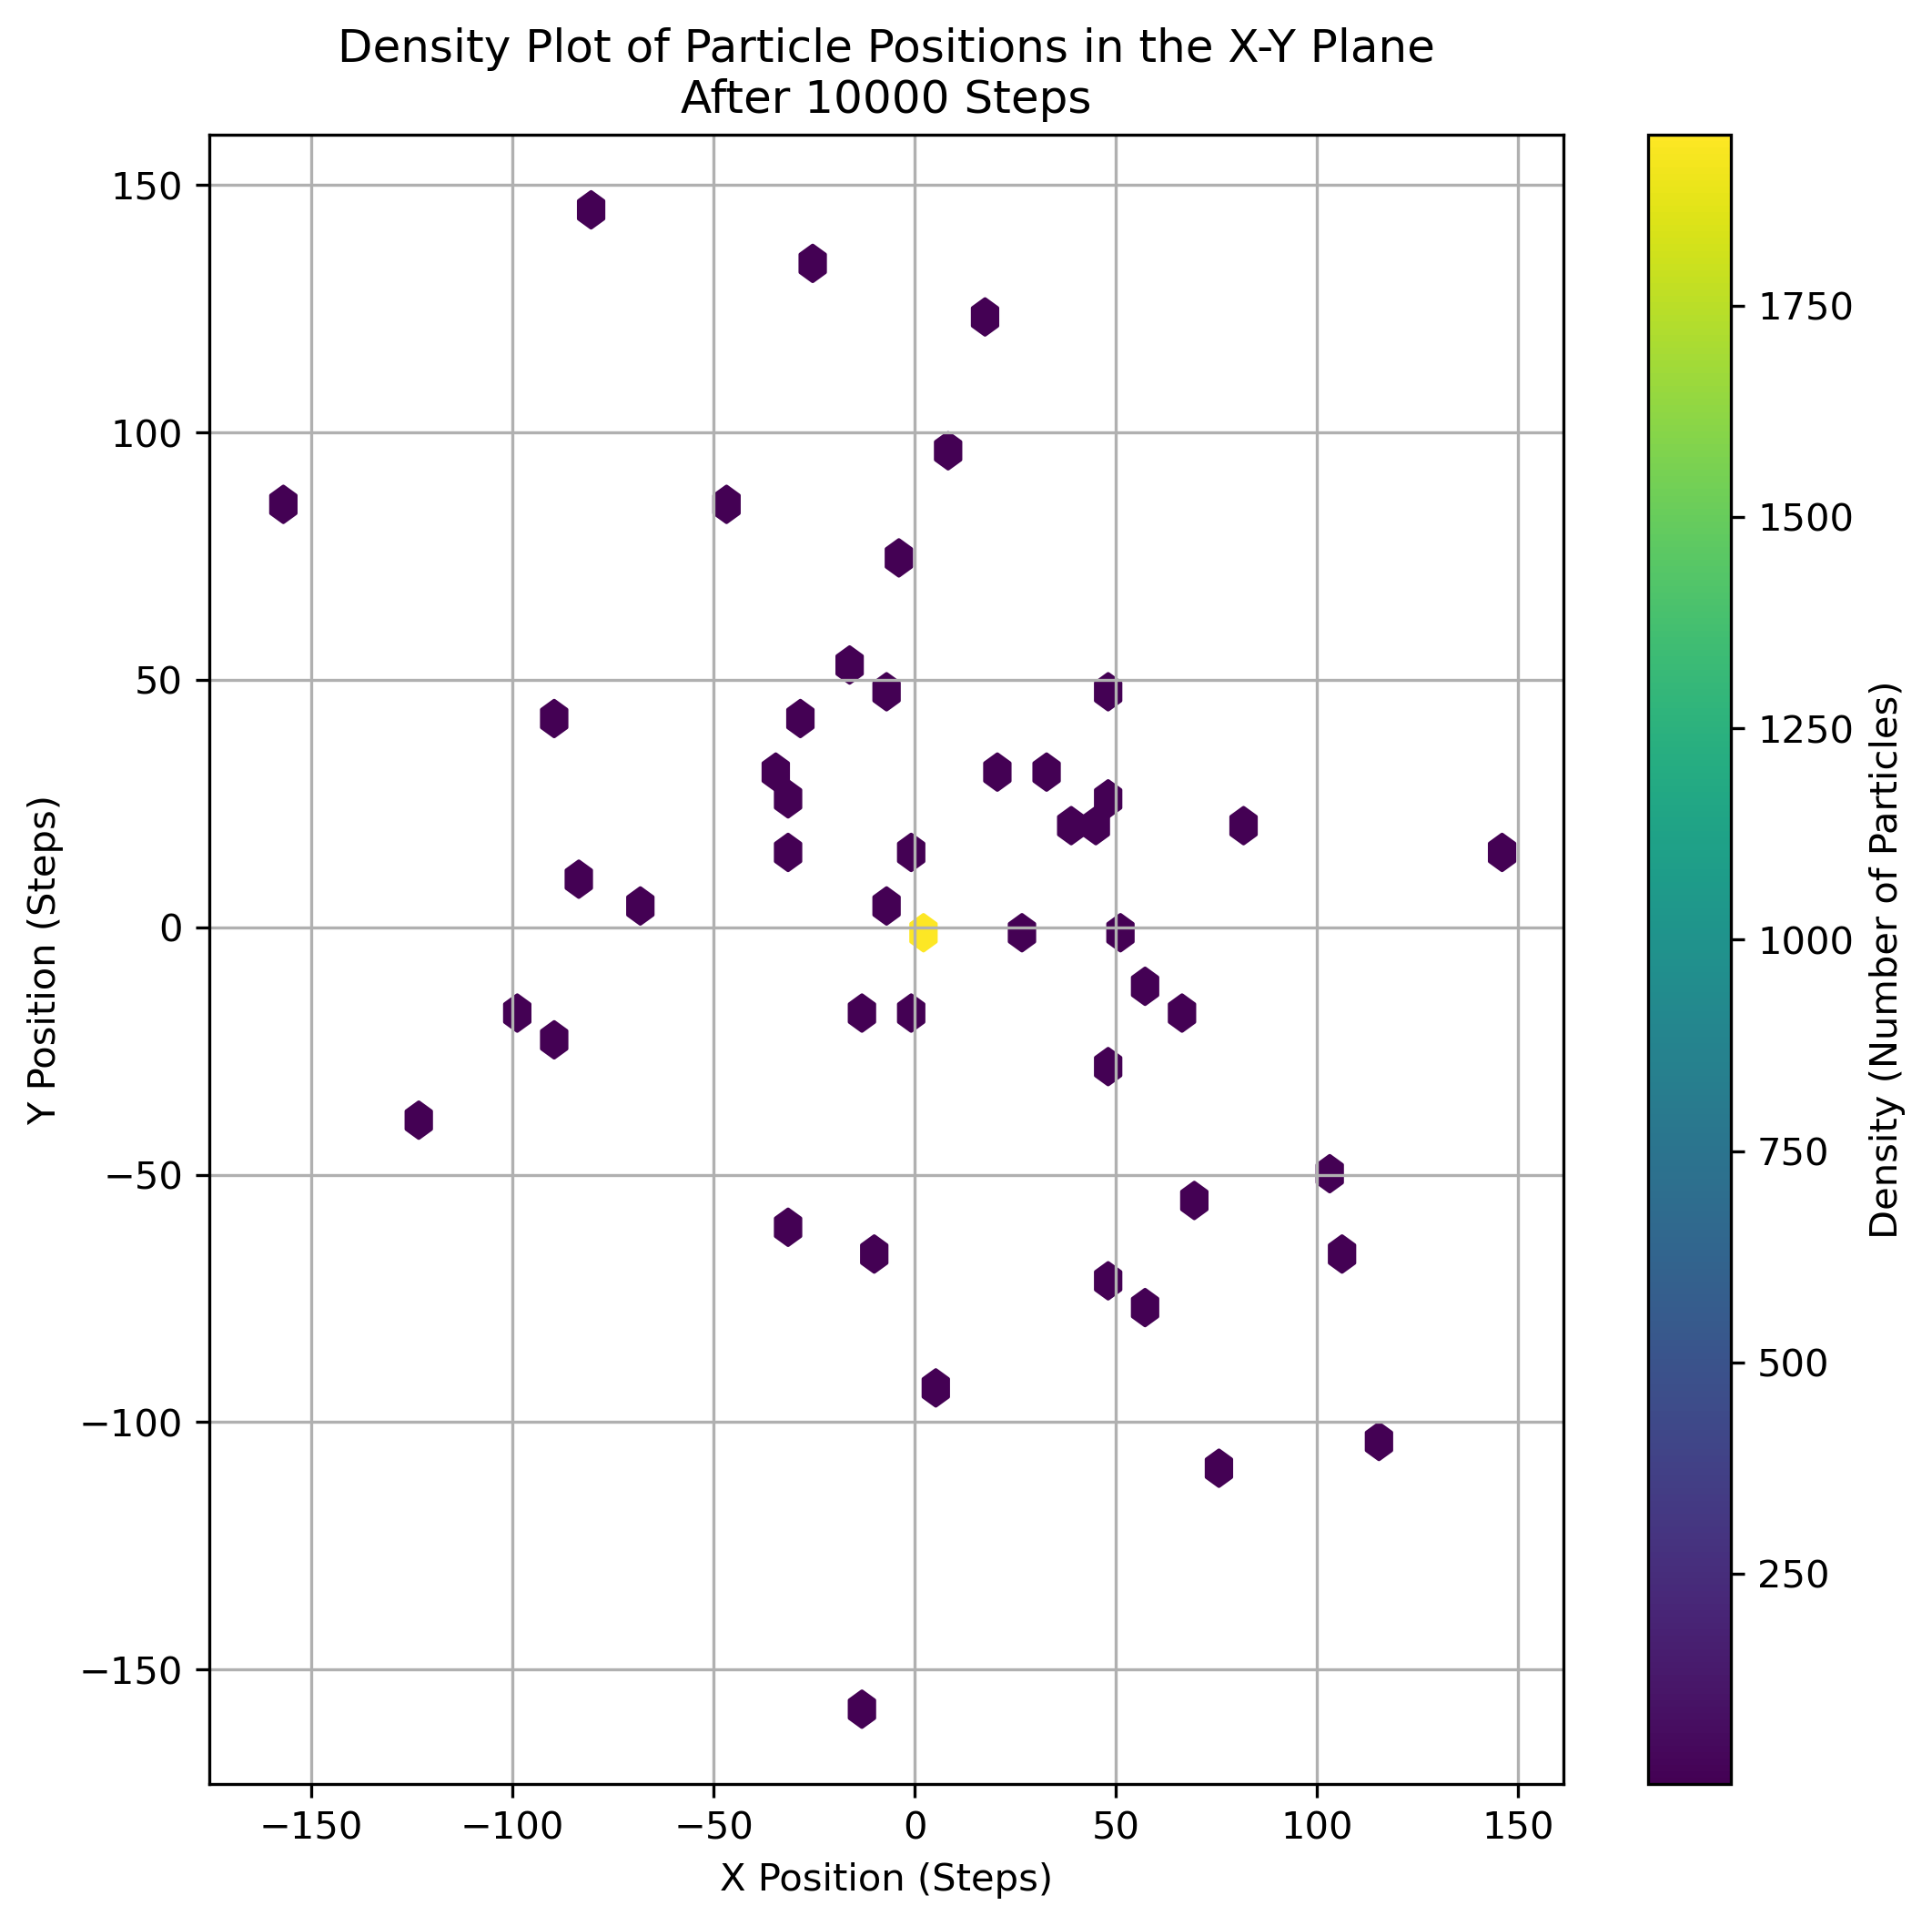

In [215]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters (already set up in previous code)
N = 2000          # Number of particles
steps = 10000     # Number of steps per particle
time_per_step = 1 # Time per step (unit time)
step_length = 1   # Step length (unit length)

# Calculate the radial distance (r) from the origin for all particles at the last time step
radii = np.sqrt(positions[:, -1, 0]**2 + positions[:, -1, 1]**2)

# Create the density plot
plt.figure(figsize=(8, 8), dpi=300)

# Plotting histogram of particle positions in the x-y plane (colored by radial distance)
plt.hexbin(positions[:, -1, 0], positions[:, -1, 1], gridsize=50, cmap='viridis', mincnt=1)

# Add a color bar to show the mapping of density to color
plt.colorbar(label='Density (Number of Particles)')

# Set the axis labels and title
plt.title(f"Density Plot of Particle Positions in the X-Y Plane\nAfter {steps} Steps")
plt.xlabel("X Position (Steps)")
plt.ylabel("Y Position (Steps)")

# Show the plot
plt.grid(True)
plt.show()